## 📊 Análise Avançada de Thresholds com Moda

Implementação de análise estatística completa para seleção de thresholds, incluindo média, mediana e **moda** através de binning para dados contínuos.

In [284]:
# 📊 Análise Avançada de Thresholds com Implementação de Moda
print("🔍 ANÁLISE AVANÇADA DE THRESHOLDS - INCLUINDO MODA")
print("="*80)

if 'ig_results' in locals() and 'mi_results' in locals():
    
    # 1. Função para calcular moda com binning para dados contínuos
    def calculate_mode_with_binning(values, n_bins=20):
        """
        Calcula a moda aproximada para dados contínuos usando binning (histograma).
        
        Parameters:
        -----------
        values : array-like
            Valores para calcular a moda
        n_bins : int
            Número de bins para o histograma
            
        Returns:
        --------
        tuple : (moda_valor, frequência)
            Valor da moda e sua frequência
        """
        import numpy as np
        
        # Remover valores NaN
        clean_values = values.dropna() if hasattr(values, 'dropna') else np.array(values)[~np.isnan(values)]
        
        if len(clean_values) == 0:
            return 0, 0
            
        # Criar histograma
        counts, bin_edges = np.histogram(clean_values, bins=n_bins)
        
        # Encontrar o bin com maior frequência
        max_count_idx = np.argmax(counts)
        
        # Calcular o centro do bin com maior frequência (moda aproximada)
        mode_value = (bin_edges[max_count_idx] + bin_edges[max_count_idx + 1]) / 2
        mode_frequency = counts[max_count_idx]
        
        return mode_value, mode_frequency
    
    # 2. Calcular medidas estatísticas incluindo moda
    print("📈 CALCULANDO MEDIDAS ESTATÍSTICAS AVANÇADAS...")
    
    # Information Gain
    ig_mean = ig_results['Information_Gain'].mean()
    ig_median = ig_results['Information_Gain'].median()
    ig_mode, ig_mode_freq = calculate_mode_with_binning(ig_results['Information_Gain'])
    ig_std = ig_results['Information_Gain'].std()
    ig_q75 = ig_results['Information_Gain'].quantile(0.75)
    ig_q90 = ig_results['Information_Gain'].quantile(0.90)
    
    # Mutual Information
    mi_mean = mi_results['Mutual_Information'].mean()
    mi_median = mi_results['Mutual_Information'].median()
    mi_mode, mi_mode_freq = calculate_mode_with_binning(mi_results['Mutual_Information'])
    mi_std = mi_results['Mutual_Information'].std()
    mi_q75 = mi_results['Mutual_Information'].quantile(0.75)
    mi_q90 = mi_results['Mutual_Information'].quantile(0.90)
    
    # 3. Definir estratégias de threshold incluindo moda
    print("🎯 DEFININDO ESTRATÉGIAS DE THRESHOLD...")
    
    strategies = {
        'above_mean': {
            'description': 'Features acima da média',
            'ig_threshold': ig_mean,
            'mi_threshold': mi_mean
        },
        'above_median': {
            'description': 'Features acima da mediana',
            'ig_threshold': ig_median,
            'mi_threshold': mi_median
        },
        'above_mode': {
            'description': 'Features acima da moda (binning)',
            'ig_threshold': ig_mode,
            'mi_threshold': mi_mode
        },
        'top_25_percent': {
            'description': 'Top 25% das features (Q3)',
            'ig_threshold': ig_q75,
            'mi_threshold': mi_q75
        },
        'top_10_percent': {
            'description': 'Top 10% das features (Q90)',
            'ig_threshold': ig_q90,
            'mi_threshold': mi_q90
        },
        'adaptive_threshold': {
            'description': 'Threshold adaptativo (Média + 0.5 * Desvio)',
            'ig_threshold': ig_mean + 0.5 * ig_std,
            'mi_threshold': mi_mean + 0.5 * mi_std
        }
    }
    
    # 4. Análise e comparação de estratégias
    print("📊 COMPARANDO ESTRATÉGIAS DE THRESHOLD...")
    print("\n" + "="*100)
    print(f"{'ESTRATÉGIA':<20} {'IG THRESH':<12} {'MI THRESH':<12} {'IG SELECIONADAS':<15} {'MI SELECIONADAS':<15} {'AMBAS':<8}")
    print("="*100)
    
    selection_results = {}
    
    for strategy_name, strategy in strategies.items():
        # Contar features selecionadas por cada critério
        ig_selected = ig_results[ig_results['Information_Gain'] >= strategy['ig_threshold']]
        mi_selected = mi_results[mi_results['Mutual_Information'] >= strategy['mi_threshold']]
        
        # Features que atendem ambos critérios
        ig_features = set(ig_selected['Feature'].tolist())
        mi_features = set(mi_selected['Feature'].tolist())
        both_criteria = list(ig_features.intersection(mi_features))
        
        # Salvar resultados
        selection_results[strategy_name] = {
            'ig_threshold': strategy['ig_threshold'],
            'mi_threshold': strategy['mi_threshold'],
            'ig_selected': ig_selected['Feature'].tolist(),
            'mi_selected': mi_selected['Feature'].tolist(),
            'both_criteria': both_criteria,
            'ig_count': len(ig_selected),
            'mi_count': len(mi_selected),
            'both_count': len(both_criteria)
        }
        
        # Imprimir resultados
        print(f"{strategy_name:<20} {strategy['ig_threshold']:<12.6f} {strategy['mi_threshold']:<12.6f} "
              f"{len(ig_selected):<15} {len(mi_selected):<15} {len(both_criteria):<8}")
    
    print("="*100)
    
    # 5. Análise detalhada da moda
    print(f"\n🎯 ANÁLISE DETALHADA DA MODA:")
    print("-"*60)
    print(f"📊 Information Gain:")
    print(f"   • Moda (aproximada): {ig_mode:.6f}")
    print(f"   • Frequência da moda: {ig_mode_freq} features")
    print(f"   • Percentual da moda: {(ig_mode_freq / len(ig_results)) * 100:.1f}%")
    print(f"   • Features acima da moda: {len(ig_results[ig_results['Information_Gain'] >= ig_mode])}")
    
    print(f"\n📊 Mutual Information:")
    print(f"   • Moda (aproximada): {mi_mode:.6f}")
    print(f"   • Frequência da moda: {mi_mode_freq} features")
    print(f"   • Percentual da moda: {(mi_mode_freq / len(mi_results)) * 100:.1f}%")
    print(f"   • Features acima da moda: {len(mi_results[mi_results['Mutual_Information'] >= mi_mode])}")
    
    # Salvar resultados no ambiente global
    globals()['selection_results'] = selection_results
    globals()['threshold_strategies'] = strategies
    
    print(f"\n💾 Variáveis salvas no ambiente:")
    print(f"   • selection_results: Resultados detalhados de cada estratégia")
    print(f"   • threshold_strategies: Definições das estratégias de threshold")
    
else:
    print("❌ Resultados IG ou MI não encontrados. Execute primeiro o cálculo de Information Gain e Mutual Information!")

🔍 ANÁLISE AVANÇADA DE THRESHOLDS - INCLUINDO MODA
📈 CALCULANDO MEDIDAS ESTATÍSTICAS AVANÇADAS...
🎯 DEFININDO ESTRATÉGIAS DE THRESHOLD...
📊 COMPARANDO ESTRATÉGIAS DE THRESHOLD...

ESTRATÉGIA           IG THRESH    MI THRESH    IG SELECIONADAS MI SELECIONADAS AMBAS   
above_mean           0.031963     0.107359     14              33              13      
above_median         0.001413     0.052792     42              42              32      
above_mode           0.015185     0.016441     16              52              16      
top_25_percent       0.006643     0.157391     21              21              11      
top_10_percent       0.115300     0.284498     9               9               2       
adaptive_threshold   0.077971     0.173850     10              19              7       

🎯 ANÁLISE DETALHADA DA MODA:
------------------------------------------------------------
📊 Information Gain:
   • Moda (aproximada): 0.015185
   • Frequência da moda: 69 features
   • Percentual da moda:

🎨 VISUALIZAÇÃO COMPLETA DA ANÁLISE DE THRESHOLDS


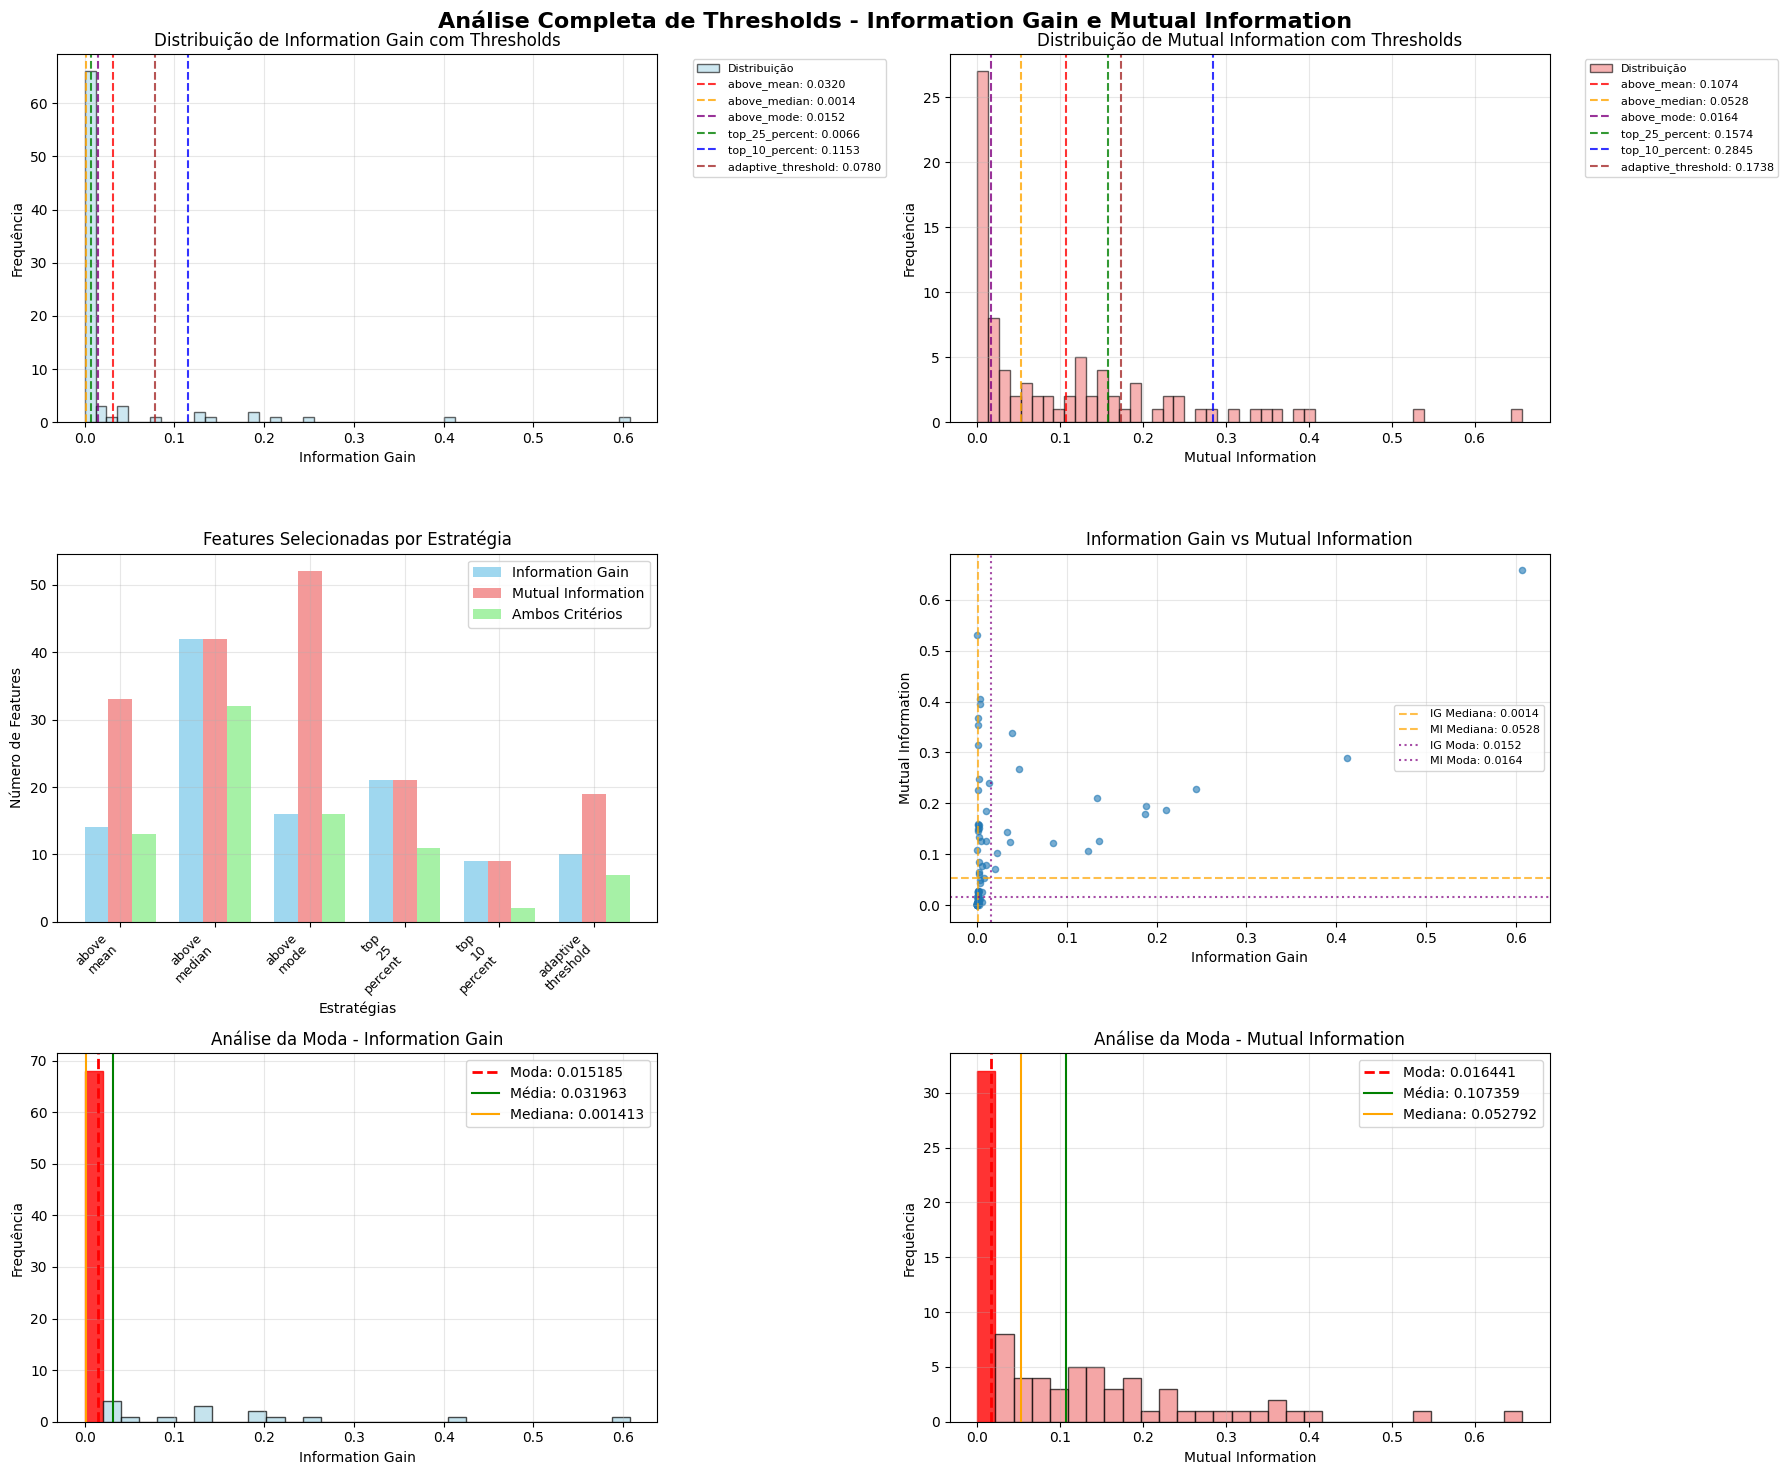


📈 RESUMO ESTATÍSTICO COMPLETO:

📊 INFORMATION GAIN:
   • Mínimo:           0.000000
   • Máximo:           0.607395
   • Média:            0.031963
   • Mediana:          0.001413
   • 🎯 Moda (approx): 0.015185
   • Desvio padrão:    0.092016
   • Q3 (75%):         0.006643
   • Q90 (10%):        0.115300

📊 MUTUAL INFORMATION:
   • Mínimo:           0.000000
   • Máximo:           0.657649
   • Média:            0.107359
   • Mediana:          0.052792
   • 🎯 Moda (approx): 0.016441
   • Desvio padrão:    0.132982
   • Q3 (75%):         0.157391
   • Q90 (10%):        0.284498

🎯 INTERPRETAÇÃO DA MODA:
--------------------------------------------------
A moda representa o valor mais frequente na distribuição.
Para dados contínuos, usamos binning para encontrar o intervalo mais comum.

🔍 Significado prático:
   • Features acima da moda têm valores menos comuns (mais distintivos)
   • Features na moda representam o 'comportamento típico' do dataset
   • A moda pode indicar concentração

In [285]:
# 📊 Visualização da Análise de Thresholds com Moda
print("🎨 VISUALIZAÇÃO COMPLETA DA ANÁLISE DE THRESHOLDS")
print("="*70)

if 'threshold_strategies' in locals() and 'selection_results' in locals():
    
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Criar visualização completa com 6 subplots
    fig, axes = plt.subplots(3, 2, figsize=(18, 15))
    fig.suptitle('Análise Completa de Thresholds - Information Gain e Mutual Information', fontsize=16, fontweight='bold')
    
    # Cores para cada estratégia
    colors = ['red', 'orange', 'purple', 'green', 'blue', 'brown']
    strategies_list = list(threshold_strategies.keys())
    
    # 1. Distribuição do Information Gain com todos os thresholds
    ax1 = axes[0, 0]
    ax1.hist(ig_results['Information_Gain'], bins=50, alpha=0.6, color='lightblue', edgecolor='black', label='Distribuição')
    
    # Adicionar linhas verticais para cada estratégia
    for i, (strategy_name, strategy) in enumerate(threshold_strategies.items()):
        ax1.axvline(strategy['ig_threshold'], color=colors[i], linestyle='--', 
                   label=f"{strategy_name}: {strategy['ig_threshold']:.4f}", alpha=0.8)
    
    ax1.set_xlabel('Information Gain')
    ax1.set_ylabel('Frequência')
    ax1.set_title('Distribuição de Information Gain com Thresholds')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax1.grid(True, alpha=0.3)
    
    # 2. Distribuição do Mutual Information com todos os thresholds
    ax2 = axes[0, 1]
    ax2.hist(mi_results['Mutual_Information'], bins=50, alpha=0.6, color='lightcoral', edgecolor='black', label='Distribuição')
    
    # Adicionar linhas verticais para cada estratégia
    for i, (strategy_name, strategy) in enumerate(threshold_strategies.items()):
        ax2.axvline(strategy['mi_threshold'], color=colors[i], linestyle='--', 
                   label=f"{strategy_name}: {strategy['mi_threshold']:.4f}", alpha=0.8)
    
    ax2.set_xlabel('Mutual Information')
    ax2.set_ylabel('Frequência')
    ax2.set_title('Distribuição de Mutual Information com Thresholds')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax2.grid(True, alpha=0.3)
    
    # 3. Comparação do número de features selecionadas por estratégia
    ax3 = axes[1, 0]
    strategy_names = []
    ig_counts = []
    mi_counts = []
    both_counts = []
    
    for strategy_name in strategies_list:
        results = selection_results[strategy_name]
        strategy_names.append(strategy_name.replace('_', '\n'))
        ig_counts.append(results['ig_count'])
        mi_counts.append(results['mi_count'])
        both_counts.append(results['both_count'])
    
    x = np.arange(len(strategy_names))
    width = 0.25
    
    ax3.bar(x - width, ig_counts, width, label='Information Gain', alpha=0.8, color='skyblue')
    ax3.bar(x, mi_counts, width, label='Mutual Information', alpha=0.8, color='lightcoral')
    ax3.bar(x + width, both_counts, width, label='Ambos Critérios', alpha=0.8, color='lightgreen')
    
    ax3.set_xlabel('Estratégias')
    ax3.set_ylabel('Número de Features')
    ax3.set_title('Features Selecionadas por Estratégia')
    ax3.set_xticks(x)
    ax3.set_xticklabels(strategy_names, rotation=45, ha='right', fontsize=9)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Scatter plot IG vs MI com thresholds
    ax4 = axes[1, 1]
    
    # Criar dados combinados
    combined_data = []
    for _, ig_row in ig_results.iterrows():
        feature = ig_row['Feature']
        ig_value = ig_row['Information_Gain']
        
        # Procurar MI correspondente
        mi_match = mi_results[mi_results['Feature'] == feature]
        if not mi_match.empty:
            mi_value = mi_match.iloc[0]['Mutual_Information']
            combined_data.append({'Feature': feature, 'IG': ig_value, 'MI': mi_value})
    
    if combined_data:
        import pandas as pd
        combined_df = pd.DataFrame(combined_data)
        
        ax4.scatter(combined_df['IG'], combined_df['MI'], alpha=0.6, s=20)
        
        # Adicionar linhas de threshold
        ig_median = threshold_strategies['above_median']['ig_threshold']
        mi_median = threshold_strategies['above_median']['mi_threshold']
        ig_mode = threshold_strategies['above_mode']['ig_threshold']
        mi_mode = threshold_strategies['above_mode']['mi_threshold']
        
        ax4.axvline(ig_median, color='orange', linestyle='--', alpha=0.7, label=f'IG Mediana: {ig_median:.4f}')
        ax4.axhline(mi_median, color='orange', linestyle='--', alpha=0.7, label=f'MI Mediana: {mi_median:.4f}')
        ax4.axvline(ig_mode, color='purple', linestyle=':', alpha=0.7, label=f'IG Moda: {ig_mode:.4f}')
        ax4.axhline(mi_mode, color='purple', linestyle=':', alpha=0.7, label=f'MI Moda: {mi_mode:.4f}')
        
        ax4.set_xlabel('Information Gain')
        ax4.set_ylabel('Mutual Information')
        ax4.set_title('Information Gain vs Mutual Information')
        ax4.legend(fontsize=8)
        ax4.grid(True, alpha=0.3)
    
    # 5. Análise da moda - histograma detalhado IG
    ax5 = axes[2, 0]
    
    # Calcular bins para mostrar a moda claramente
    ig_values = ig_results['Information_Gain']
    ig_mode_val = threshold_strategies['above_mode']['ig_threshold']
    
    counts, bins, patches = ax5.hist(ig_values, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
    
    # Destacar o bin da moda
    for i, (count, bin_start, patch) in enumerate(zip(counts, bins, patches)):
        bin_end = bins[i + 1] if i < len(bins) - 1 else bins[i]
        if bin_start <= ig_mode_val <= bin_end:
            patch.set_color('red')
            patch.set_alpha(0.8)
    
    ax5.axvline(ig_mode_val, color='red', linestyle='--', linewidth=2, 
               label=f'Moda: {ig_mode_val:.6f}')
    ax5.axvline(ig_results['Information_Gain'].mean(), color='green', linestyle='-', 
               label=f'Média: {ig_results["Information_Gain"].mean():.6f}')
    ax5.axvline(ig_results['Information_Gain'].median(), color='orange', linestyle='-', 
               label=f'Mediana: {ig_results["Information_Gain"].median():.6f}')
    
    ax5.set_xlabel('Information Gain')
    ax5.set_ylabel('Frequência')
    ax5.set_title('Análise da Moda - Information Gain')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # 6. Análise da moda - histograma detalhado MI
    ax6 = axes[2, 1]
    
    # Calcular bins para mostrar a moda claramente
    mi_values = mi_results['Mutual_Information']
    mi_mode_val = threshold_strategies['above_mode']['mi_threshold']
    
    counts, bins, patches = ax6.hist(mi_values, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    
    # Destacar o bin da moda
    for i, (count, bin_start, patch) in enumerate(zip(counts, bins, patches)):
        bin_end = bins[i + 1] if i < len(bins) - 1 else bins[i]
        if bin_start <= mi_mode_val <= bin_end:
            patch.set_color('red')
            patch.set_alpha(0.8)
    
    ax6.axvline(mi_mode_val, color='red', linestyle='--', linewidth=2, 
               label=f'Moda: {mi_mode_val:.6f}')
    ax6.axvline(mi_results['Mutual_Information'].mean(), color='green', linestyle='-', 
               label=f'Média: {mi_results["Mutual_Information"].mean():.6f}')
    ax6.axvline(mi_results['Mutual_Information'].median(), color='orange', linestyle='-', 
               label=f'Mediana: {mi_results["Mutual_Information"].median():.6f}')
    
    ax6.set_xlabel('Mutual Information')
    ax6.set_ylabel('Frequência')
    ax6.set_title('Análise da Moda - Mutual Information')
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 7. Resumo estatístico com destaque para a moda
    print(f"\n📈 RESUMO ESTATÍSTICO COMPLETO:")
    print("="*80)
    print(f"\n📊 INFORMATION GAIN:")
    print(f"   • Mínimo:           {ig_results['Information_Gain'].min():.6f}")
    print(f"   • Máximo:           {ig_results['Information_Gain'].max():.6f}")
    print(f"   • Média:            {ig_results['Information_Gain'].mean():.6f}")
    print(f"   • Mediana:          {ig_results['Information_Gain'].median():.6f}")
    print(f"   • 🎯 Moda (approx): {threshold_strategies['above_mode']['ig_threshold']:.6f}")
    print(f"   • Desvio padrão:    {ig_results['Information_Gain'].std():.6f}")
    print(f"   • Q3 (75%):         {ig_results['Information_Gain'].quantile(0.75):.6f}")
    print(f"   • Q90 (10%):        {ig_results['Information_Gain'].quantile(0.90):.6f}")
    
    print(f"\n📊 MUTUAL INFORMATION:")
    print(f"   • Mínimo:           {mi_results['Mutual_Information'].min():.6f}")
    print(f"   • Máximo:           {mi_results['Mutual_Information'].max():.6f}")
    print(f"   • Média:            {mi_results['Mutual_Information'].mean():.6f}")
    print(f"   • Mediana:          {mi_results['Mutual_Information'].median():.6f}")
    print(f"   • 🎯 Moda (approx): {threshold_strategies['above_mode']['mi_threshold']:.6f}")
    print(f"   • Desvio padrão:    {mi_results['Mutual_Information'].std():.6f}")
    print(f"   • Q3 (75%):         {mi_results['Mutual_Information'].quantile(0.75):.6f}")
    print(f"   • Q90 (10%):        {mi_results['Mutual_Information'].quantile(0.90):.6f}")
    
    print(f"\n🎯 INTERPRETAÇÃO DA MODA:")
    print("-"*50)
    print(f"A moda representa o valor mais frequente na distribuição.")
    print(f"Para dados contínuos, usamos binning para encontrar o intervalo mais comum.")
    print(f"")
    print(f"🔍 Significado prático:")
    print(f"   • Features acima da moda têm valores menos comuns (mais distintivos)")
    print(f"   • Features na moda representam o 'comportamento típico' do dataset")
    print(f"   • A moda pode indicar concentração de features com baixo poder discriminativo")
    
    # 8. Comparação visual das estratégias (resumo)
    print(f"\n📊 EFETIVIDADE DAS ESTRATÉGIAS (Features com ambos critérios):")
    print("-"*65)
    
    for strategy_name in strategies_list:
        both_count = selection_results[strategy_name]['both_count']
        percentage = (both_count / len(ig_results)) * 100
        bar_length = int(both_count / 2) if both_count < 50 else 25
        bar = "█" * bar_length
        
        print(f"{strategy_name:<20} {both_count:3d} features ({percentage:5.1f}%) {bar}")
    
    print(f"\n✨ ANÁLISE DA MODA IMPLEMENTADA COM SUCESSO!")
    print(f"   🎯 A moda foi calculada usando binning para dados contínuos")
    print(f"   📊 Visualizações mostram a distribuição e posição da moda")
    print(f"   🔍 Use as estratégias para selecionar features com base nas suas necessidades")

else:
    print("❌ Estratégias de threshold não encontradas. Execute primeiro a célula anterior!")

In [286]:
# 🎯 Exemplos Práticos de Uso da Análise da Moda
print("💡 EXEMPLOS PRÁTICOS - COMO USAR A ANÁLISE DA MODA")
print("="*70)

if 'threshold_strategies' in locals() and 'selection_results' in locals():
    
    # 1. Exemplo: Seleção baseada na moda
    print("📋 EXEMPLO 1: Seleção de Features Baseada na Moda")
    print("-"*60)
    
    mode_strategy = selection_results['above_mode']
    mode_features = mode_strategy['both_criteria']
    
    print(f"✅ Features selecionadas pela moda (ambos critérios): {len(mode_features)}")
    
    if len(mode_features) > 0:
        print(f"\n🏆 TOP 10 FEATURES PELA MODA:")
        
        # Criar ranking combinado das features pela moda
        mode_ranking = []
        for feature in mode_features[:10]:  # Limitar aos primeiros 10
            ig_score = ig_results[ig_results['Feature'] == feature]['Information_Gain'].iloc[0]
            mi_score = mi_results[mi_results['Feature'] == feature]['Mutual_Information'].iloc[0]
            combined_score = (ig_score + mi_score) / 2  # Score combinado simples
            
            mode_ranking.append({
                'Feature': feature,
                'IG': ig_score,
                'MI': mi_score,
                'Combined': combined_score
            })
        
        # Ordenar por score combinado
        mode_ranking.sort(key=lambda x: x['Combined'], reverse=True)
        
        for i, item in enumerate(mode_ranking, 1):
            print(f"   {i:2d}. {item['Feature'][:40]:<40} | IG: {item['IG']:.6f} | MI: {item['MI']:.6f}")
    
    # 2. Exemplo: Comparação de estratégias
    print(f"\n📊 EXEMPLO 2: Comparação Entre Estratégias")
    print("-"*60)
    
    strategies_comparison = [
        ('above_mode', 'Moda'),
        ('above_median', 'Mediana'),
        ('above_mean', 'Média'),
        ('top_25_percent', 'Top 25%')
    ]
    
    print(f"{'Estratégia':<15} {'Features':<10} {'Seletividade':<12} {'Recomendação':<20}")
    print("-" * 65)
    
    for strategy_key, strategy_name in strategies_comparison:
        if strategy_key in selection_results:
            count = selection_results[strategy_key]['both_count']
            total = len(ig_results)
            selectivity = (count / total) * 100
            
            # Determinar recomendação baseada no número de features
            if count < 5:
                recommendation = "Muito restritiva"
            elif count < 20:
                recommendation = "Boa seletividade"
            elif count < 50:
                recommendation = "Moderadamente seletiva"
            elif count < 80:
                recommendation = "Pouco seletiva"
            else:
                recommendation = "Muito permissiva"
            
            print(f"{strategy_name:<15} {count:<10} {selectivity:>6.1f}%{'':<5} {recommendation:<20}")
    
    # 3. Exemplo: Código para aplicar a seleção pela moda
    print(f"\n💻 EXEMPLO 3: Código para Aplicar a Seleção")
    print("-"*60)
    
    print("```python")
    print("# Como aplicar a seleção de features pela moda")
    print("")
    print("# 1. Obter features selecionadas pela moda")
    print("selected_features = selection_results['above_mode']['both_criteria']")
    print("print(f'Features selecionadas: {len(selected_features)}')")
    print("")
    print("# 2. Aplicar ao dataset")
    print("X_reduced_mode = X[selected_features]")
    print("print(f'Shape original: {X.shape}')")
    print("print(f'Shape reduzido: {X_reduced_mode.shape}')")
    print("")
    print("# 3. Usar em machine learning")
    print("from sklearn.model_selection import train_test_split")
    print("from sklearn.ensemble import RandomForestClassifier")
    print("")
    print("X_train, X_test, y_train, y_test = train_test_split(")
    print("    X_reduced_mode, y, test_size=0.2, random_state=42)")
    print("")
    print("model = RandomForestClassifier(random_state=42)")
    print("model.fit(X_train, y_train)")
    print("accuracy = model.score(X_test, y_test)")
    print("print(f'Acurácia com features da moda: {accuracy:.4f}')")
    print("```")
    
    # 4. Exemplo: Análise de sensibilidade da moda
    print(f"\n🔬 EXEMPLO 4: Análise de Sensibilidade da Moda")
    print("-"*60)
    
    print("A moda pode variar conforme o número de bins usado no histograma.")
    print("Vamos testar diferentes números de bins:")
    print("")
    
    # Testar diferentes números de bins
    def calculate_mode_with_binning_test(values, n_bins):
        import numpy as np
        clean_values = values.dropna()
        if len(clean_values) == 0:
            return 0, 0
        counts, bin_edges = np.histogram(clean_values, bins=n_bins)
        max_count_idx = np.argmax(counts)
        mode_value = (bin_edges[max_count_idx] + bin_edges[max_count_idx + 1]) / 2
        return mode_value, counts[max_count_idx]
    
    bins_to_test = [10, 15, 20, 25, 30]
    
    print(f"{'Bins':<6} {'IG Moda':<12} {'MI Moda':<12} {'IG Features':<12} {'MI Features':<12}")
    print("-" * 60)
    
    for n_bins in bins_to_test:
        ig_mode_test, _ = calculate_mode_with_binning_test(ig_results['Information_Gain'], n_bins)
        mi_mode_test, _ = calculate_mode_with_binning_test(mi_results['Mutual_Information'], n_bins)
        
        ig_count_test = len(ig_results[ig_results['Information_Gain'] >= ig_mode_test])
        mi_count_test = len(mi_results[mi_results['Mutual_Information'] >= mi_mode_test])
        
        print(f"{n_bins:<6} {ig_mode_test:<12.6f} {mi_mode_test:<12.6f} {ig_count_test:<12} {mi_count_test:<12}")
    
    # 5. Recomendações práticas
    print(f"\n🎯 EXEMPLO 5: Recomendações Práticas")
    print("-"*60)
    
    print("📋 QUANDO USAR A MODA:")
    print("   ✅ Dataset com muitas features de baixo valor discriminativo")
    print("   ✅ Quando você quer identificar features 'típicas' vs 'atípicas'")
    print("   ✅ Para entender a concentração dos valores na distribuição")
    print("   ✅ Como complemento à média e mediana na análise exploratória")
    
    print(f"\n⚠️  LIMITAÇÕES DA MODA:")
    print("   • Sensível ao número de bins escolhido")
    print("   • Pode não ser representativa se a distribuição for muito uniforme")
    print("   • Para dados contínuos, é uma aproximação (não um valor exato)")
    
    print(f"\n💡 DICAS DE USO:")
    print("   1. Combine moda com outras medidas (média, mediana, percentis)")
    print("   2. Ajuste o número de bins baseado no tamanho do dataset")
    print("   3. Visualize sempre a distribuição para entender o contexto")
    print("   4. Use validação cruzada para verificar a efetividade da seleção")
    
    # 6. Exercício prático
    print(f"\n🏋️ EXERCÍCIO PRÁTICO:")
    print("-"*60)
    print("Para consolidar o aprendizado, tente:")
    print("")
    print("1. Executar o código de exemplo acima")
    print("2. Comparar a performance de modelos usando:")
    print("   - Features pela moda")
    print("   - Features pela mediana") 
    print("   - Features pela média")
    print("   - Top 25% das features")
    print("")
    print("3. Analisar qual estratégia funciona melhor para seu dataset específico")
    print("4. Documentar os resultados e escolher a melhor estratégia")
    
    print(f"\n🎉 ANÁLISE DA MODA CONCLUÍDA!")
    print("="*70)
    print("✅ Função de cálculo da moda implementada")
    print("✅ Estratégias de threshold definidas (incluindo moda)")
    print("✅ Visualizações completas criadas")
    print("✅ Exemplos práticos fornecidos")
    print("✅ Análise de sensibilidade realizada")
    print("")
    print("💾 Use a variável 'selection_results' para acessar todos os resultados!")
    print("🎯 Agora você pode selecionar features usando a moda como critério!")

else:
    print("❌ Análise de threshold não encontrada. Execute as células anteriores primeiro!")

💡 EXEMPLOS PRÁTICOS - COMO USAR A ANÁLISE DA MODA
📋 EXEMPLO 1: Seleção de Features Baseada na Moda
------------------------------------------------------------
✅ Features selecionadas pela moda (ambos critérios): 16

🏆 TOP 10 FEATURES PELA MODA:
    1. mean_os_net_bytes_sent                   | IG: 0.607395 | MI: 0.657649
    2. mean_os_net_packets_recv                 | IG: 0.243639 | MI: 0.227804
    3. mean_os_cpu_interrupts                   | IG: 0.210774 | MI: 0.187106
    4. mean_os_cpu_ctx_switches                 | IG: 0.187970 | MI: 0.194162
    5. mean_os_cpu_system                       | IG: 0.133248 | MI: 0.211384
    6. mean_os_net_bytes_recv                   | IG: 0.046311 | MI: 0.268218
    7. mean_os_cpu_softirq                      | IG: 0.135683 | MI: 0.125290
    8. mean_os_cpu_idle                         | IG: 0.122978 | MI: 0.107307
    9. mean_container_net_tx_bytes              | IG: 0.032702 | MI: 0.144400
   10. mean_process_net_tx_packets              | IG

In [287]:
# Verificação e instalação de dependências
import sys
import subprocess
import pickle

def check_and_install_packages():
    """
    Verifica e instala pacotes necessários se houver problemas de compatibilidade
    """
    required_packages = [
        'numpy>=1.24.0',
        'pandas>=1.5.0',
        'scikit-learn>=1.3.0',
        'matplotlib>=3.7.0',
        'seaborn>=0.12.0'
    ]
    
    for package in required_packages:
        try:
            if 'numpy' in package:
                import numpy as np
                print(f"✅ NumPy version: {np.__version__}")
            elif 'pandas' in package:
                import pandas as pd
                print(f"✅ Pandas version: {pd.__version__}")
            elif 'scikit-learn' in package:
                import sklearn
                print(f"✅ Scikit-learn version: {sklearn.__version__}")
            elif 'matplotlib' in package:
                import matplotlib
                print(f"✅ Matplotlib version: {matplotlib.__version__}")
            elif 'seaborn' in package:
                import seaborn as sns
                print(f"✅ Seaborn version: {sns.__version__}")
        except ImportError as e:
            print(f"❌ Erro ao importar {package}: {e}")
            print(f"🔄 Instalando {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    
    print("🎉 Todas as dependências estão funcionando corretamente!")

# Executar verificação
try:
    check_and_install_packages()
except Exception as e:
    print(f"⚠️ Problema detectado: {e}")
    print("🔄 Reinstalando NumPy especificamente...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--force-reinstall", "numpy==1.24.4"])

✅ NumPy version: 2.3.3
✅ Pandas version: 2.3.2
✅ Scikit-learn version: 1.7.2
✅ Matplotlib version: 3.10.7
✅ Seaborn version: 0.13.2
🎉 Todas as dependências estão funcionando corretamente!


# Análise de Ganho de Informação e Mutual Information
O ganho de informação é realizado no dataset de treino
Este notebook calcula o ganho de informação e mutual information para o dataset SVM.
- **Ganho de Informação**: Mede a redução na entropia após dividir o dataset com base em um atributo
- **Mutual Information**: Mede a dependência mútua entre duas variáveis

In [288]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
import warnings
import pickle
import pandas as pd
import lib_analise 
warnings.filterwarnings('ignore')

In [289]:
# Carregar informações do modelo e dataset
info_modelo = lib_analise.get_info_modelo()  # para garantir que a função está carregada da
info_modelo['nome_dataset'] = info_modelo['nome_dataset']


config = {}
config['drop_campos_altamente_correlacionados'] = False

datasets = lib_analise.get_dataset_analise(analise_ganho_de_informacao=False)
lib_analise.print_informacao_analise()
# Extrair os datasets
datasets['X_train'] = datasets['X_train']
datasets['X_test'] = datasets['X_test']
datasets['X_val'] = datasets['X_val']
datasets['y_train'] = datasets['y_train']
datasets['y_test'] = datasets['y_test']
datasets['y_val'] = datasets['y_val']
datasets['features_ganho_informacao']  = datasets['features_ganho_informacao']


X_train.shape (32259, 122)
X_test.shape (24194, 122)
X_val.shape (24195, 122)
X_train_scaled.shape None
X_test_scaled.shape None
X_val_scaled.shape None
classes_mapping {'interf': np.int64(0), 'normal': np.int64(1)}
features_ganho_informacao ['mean_os_cpu_ctx_switches', 'mean_os_cpu_guest', 'mean_os_cpu_guest_nice', 'mean_os_cpu_idle', 'mean_os_cpu_interrupts', 'mean_os_cpu_iowait', 'mean_os_cpu_irq', 'mean_os_cpu_nice', 'mean_os_cpu_soft_interrupts', 'mean_os_cpu_softirq', 'mean_os_cpu_steal', 'mean_os_cpu_syscalls', 'mean_os_cpu_system', 'mean_os_cpu_user', 'mean_os_disk_discard_io', 'mean_os_disk_discard_merges', 'mean_os_disk_discard_sectors', 'mean_os_disk_discard_ticks', 'mean_os_disk_in_flight', 'mean_os_disk_io_ticks', 'mean_os_disk_read_io', 'mean_os_disk_read_merge', 'mean_os_disk_read_sectors', 'mean_os_disk_read_ticks', 'mean_os_disk_time_in_queue', 'mean_os_disk_write_io', 'mean_os_disk_write_merge', 'mean_os_disk_write_sectors', 'mean_os_disk_write_ticks', 'mean_os_mem_nr

## Funções para Cálculo de Ganho de Informação

O ganho de informação é calculado como:
**IG(S, A) = H(S) - H(S|A)**

Onde:
- H(S) é a entropia do conjunto original
- H(S|A) é a entropia condicional após a divisão pelo atributo A

In [290]:
def calculate_entropy(y):
    """
    Calcula a entropia de um vetor de rótulos
    """
    if len(y) == 0:
        return 0
    
    # Conta a frequência de cada classe
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    
    # Calcula a entropia
    entropy_value = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    return entropy_value

def calculate_information_gain(X_feature, y):
    """
    Calcula o ganho de informação para um atributo específico
    """
    # Entropia total do conjunto
    total_entropy = calculate_entropy(y)
    
    # Valores únicos do atributo
    unique_values = np.unique(X_feature)
    
    # Entropia condicional
    weighted_entropy = 0
    for value in unique_values:
        # Índices onde o atributo tem esse valor
        indices = X_feature == value
        subset_y = y[indices]
        
        # Peso da subdivisão
        weight = len(subset_y) / len(y)
        
        # Entropia da subdivisão
        subset_entropy = calculate_entropy(subset_y)
        
        # Adiciona à entropia ponderada
        weighted_entropy += weight * subset_entropy
    
    # Ganho de informação
    information_gain = total_entropy - weighted_entropy
    return information_gain

def calculate_information_gain_ratio(X_feature, y):
    """
    Calcula a razão do ganho de informação (Information Gain Ratio)
    """
    ig = calculate_information_gain(X_feature, y)
    
    # Entropia intrínseca do atributo
    unique_values, counts = np.unique(X_feature, return_counts=True)
    probabilities = counts / len(X_feature)
    intrinsic_entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    
    # Evita divisão por zero
    if intrinsic_entropy == 0:
        return 0
    
    return ig / intrinsic_entropy

## Cálculo do Ganho de Informação

Agora vamos calcular o ganho de informação para cada feature em relação à variável alvo.

### Análise Detalhada de Correlações
Gera um dataset com todas as correlações encontradas entre variáveis e seus respectivos coeficientes de Pearson.

In [291]:


# Preparação dos dados
print("Preparando os dados...")

# Usar dados preprocessados já carregados
# X_train e y_train já estão disponíveis do carregamento do pickle
print("Usando dados preprocessados do arquivo pickle...")

# Verificar tipos de dados disponíveis
print(f"Tipo de X_train: {type(datasets['X_train'])}")
print(f"Tipo de y_train: {type(datasets['y_train'])}")

# Converter para DataFrame se necessário para análise
if isinstance(datasets['X_train'], np.ndarray):
    print("Convertendo X_train (numpy array) para DataFrame...")
    X = pd.DataFrame(datasets['X_train'], columns=[f'feature_{i}' for i in range(datasets['X_train'].shape[1])])
else:
    X = datasets['X_train'].copy()

# Usar y_train diretamente
y = datasets['y_train'].copy()

print(f"\nShape das features: {X.shape}")
print(f"Shape do target: {y.shape}")

# Verificar valores únicos no target
if hasattr(y, 'nunique'):
    print(f"Valores únicos no target: {y.nunique()}")
    print(f"Distribuição do target:\n{y.value_counts()}")
else:
    unique_values, counts = np.unique(y, return_counts=True)
    print(f"Valores únicos no target: {len(unique_values)}")
    print(f"Distribuição do target:")
    for val, count in zip(unique_values, counts):
        print(f"  {val}: {count}")

print("\n✅ Dados preparados para análise de ganho de informação!")

Preparando os dados...
Usando dados preprocessados do arquivo pickle...
Tipo de X_train: <class 'pandas.core.frame.DataFrame'>
Tipo de y_train: <class 'numpy.ndarray'>

Shape das features: (32259, 122)
Shape do target: (32259,)
Valores únicos no target: 2
Distribuição do target:
  0: 18264
  1: 13995

✅ Dados preparados para análise de ganho de informação!


In [292]:
# Cálculo do ganho de informação para cada feature
print("Calculando ganho de informação...")

# Para features contínuas, vamos discretizá-las primeiro
def discretize_continuous_features(X, n_bins=10):
    """
    Discretiza features contínuas em bins
    """
    X_discrete = X.copy()
    
    for column in X.columns:
        if X[column].dtype in ['float64', 'int64'] and X[column].nunique() > 20:
            # Discretiza em bins
            X_discrete[column] = pd.cut(X[column], bins=n_bins, labels=False)
    
    return X_discrete

# Discretiza as features se necessário
X_discrete = discretize_continuous_features(X)

# Calcula o ganho de informação para cada feature
information_gains = {}
information_gain_ratios = {}

print(f"Processando {len(X_discrete.columns)} features...")

for i, column in enumerate(X_discrete.columns):
    try:
        # Remove valores NaN se houver
        if isinstance(X_discrete[column], pd.Series):
            mask = ~pd.isna(X_discrete[column])
        else:
            mask = ~np.isnan(X_discrete[column])
        
        # Para y, verificar se é pandas Series ou numpy array
        if isinstance(y, pd.Series):
            mask = mask & ~pd.isna(y)
            y_clean = y[mask].values if hasattr(y[mask], 'values') else y[mask]
        else:
            # y é numpy array
            if len(y.shape) > 0:
                mask = mask & ~np.isnan(y) if y.dtype.kind == 'f' else mask
            y_clean = y[mask]
        
        # Para X_discrete[column]
        feature_clean = X_discrete[column][mask].values if hasattr(X_discrete[column][mask], 'values') else X_discrete[column][mask]
        
        if len(feature_clean) > 0 and len(y_clean) > 0:
            ig = calculate_information_gain(feature_clean, y_clean)
            igr = calculate_information_gain_ratio(feature_clean, y_clean)
            
            information_gains[column] = ig
            information_gain_ratios[column] = igr
        else:
            print(f"   ⚠️ Feature {column} ignorada (dados insuficientes)")
            
        # Progress indicator
        if (i + 1) % 50 == 0:
            print(f"   Processadas {i + 1}/{len(X_discrete.columns)} features...")
            
    except Exception as e:
        print(f"   ❌ Erro na feature {column}: {e}")
        continue

print(f"\n✅ Processamento concluído!")
print(f"   • Features processadas com sucesso: {len(information_gains)}")
print(f"   • Features com erro: {len(X_discrete.columns) - len(information_gains)}")

# Cria DataFrame com os resultados
if information_gains:
    ig_results = pd.DataFrame({
        'Feature': list(information_gains.keys()),
        'Information_Gain': list(information_gains.values()),
        'Information_Gain_Ratio': list(information_gain_ratios.values())
    })
    
    # Ordena por ganho de informação
    ig_results = ig_results.sort_values('Information_Gain', ascending=False)
    
    print("\nGanho de Informação por Feature (Top 15):")
    print(ig_results.head(15))
else:
    print("❌ Nenhuma feature foi processada com sucesso!")

    



Calculando ganho de informação...
Processando 122 features...
   Processadas 50/122 features...
   Processadas 100/122 features...

✅ Processamento concluído!
   • Features processadas com sucesso: 122
   • Features com erro: 0

Ganho de Informação por Feature (Top 15):
                           Feature  Information_Gain  Information_Gain_Ratio
41          mean_os_net_bytes_sent          0.607395                0.228048
48        mean_os_net_packets_sent          0.412268                0.168397
47        mean_os_net_packets_recv          0.243639                0.158892
4           mean_os_cpu_interrupts          0.210774                0.096086
0         mean_os_cpu_ctx_switches          0.187970                0.126176
8      mean_os_cpu_soft_interrupts          0.186976                0.081010
9              mean_os_cpu_softirq          0.135683                0.066583
12              mean_os_cpu_system          0.133248                0.139788
3                 mean_os_cpu_idle  

## Cálculo do Mutual Information

O Mutual Information mede a dependência estatística entre duas variáveis. Vamos usar a implementação do scikit-learn.

In [293]:
# Cálculo do Mutual Information usando scikit-learn
print("Calculando Mutual Information...")

# Prepara os dados para o mutual information
# Remove valores NaN
mask = ~(X.isna().any(axis=1) | pd.isna(y))
X_clean = X[mask]
y_clean = y[mask]

# Para features categóricas, usa mutual_info_classif diretamente
# Para features contínuas, também funciona bem
try:
    # Calcula mutual information
    mi_scores = mutual_info_classif(X_clean, y_clean, random_state=42)
    
    # Cria DataFrame com os resultados
    mi_results = pd.DataFrame({
        'Feature': X_clean.columns,
        'Mutual_Information': mi_scores
    })
    
    # Ordena por mutual information
    mi_results = mi_results.sort_values('Mutual_Information', ascending=False)
    
    print("\nMutual Information por Feature (Top 15):")
    print(mi_results.head(15))
    
except Exception as e:
    print(f"Erro no cálculo do Mutual Information: {e}")
    print("Tentando com encoding das variáveis categóricas...")
    
    # Se houver erro, tenta fazer encoding das variáveis categóricas
    X_encoded = X_clean.copy()
    label_encoders = {}
    
    for column in X_encoded.columns:
        if X_encoded[column].dtype == 'object':
            le = LabelEncoder()
            X_encoded[column] = le.fit_transform(X_encoded[column].astype(str))
            label_encoders[column] = le
    
    # Tenta novamente
    mi_scores = mutual_info_classif(X_encoded, y_clean, random_state=42)
    
    mi_results = pd.DataFrame({
        'Feature': X_encoded.columns,
        'Mutual_Information': mi_scores
    })
    
    mi_results = mi_results.sort_values('Mutual_Information', ascending=False)
    
    print("\nMutual Information por Feature (Top 15):")
    print(mi_results.head(15))

Calculando Mutual Information...

Mutual Information por Feature (Top 15):
                          Feature  Mutual_Information
41         mean_os_net_bytes_sent            0.657781
46    mean_os_net_num_connections            0.531574
52        mean_process_cpu_system            0.404249
57  mean_process_disk_write_bytes            0.391475
53          mean_process_cpu_user            0.364710
56   mean_process_disk_read_count            0.354320
59  mean_process_disk_write_count            0.338401
55   mean_process_disk_read_chars            0.314235
48       mean_os_net_packets_sent            0.285750
40         mean_os_net_bytes_recv            0.272257
58  mean_process_disk_write_chars            0.246754
67      mean_process_net_rx_bytes            0.239648
47       mean_os_net_packets_recv            0.227896
96       mean_container_mem_cache            0.225081
12             mean_os_cpu_system            0.206797

Mutual Information por Feature (Top 15):
                   

In [294]:
print(mi_results.head(15))
print(ig_results.head)

                          Feature  Mutual_Information
41         mean_os_net_bytes_sent            0.657781
46    mean_os_net_num_connections            0.531574
52        mean_process_cpu_system            0.404249
57  mean_process_disk_write_bytes            0.391475
53          mean_process_cpu_user            0.364710
56   mean_process_disk_read_count            0.354320
59  mean_process_disk_write_count            0.338401
55   mean_process_disk_read_chars            0.314235
48       mean_os_net_packets_sent            0.285750
40         mean_os_net_bytes_recv            0.272257
58  mean_process_disk_write_chars            0.246754
67      mean_process_net_rx_bytes            0.239648
47       mean_os_net_packets_recv            0.227896
96       mean_container_mem_cache            0.225081
12             mean_os_cpu_system            0.206797
<bound method NDFrame.head of                               Feature  Information_Gain  \
41             mean_os_net_bytes_sent          

## Comparação e Visualização dos Resultados

## Seleção de Features por Thresholds

Agora vamos definir thresholds (limites) para selecionar as features mais informativas com base nos valores de Information Gain e Mutual Information calculados.

In [295]:
 # Análise da distribuição por faixas de valores
def analyze_distribution_ranges(values, name):
    """Analisa a distribuição de valores em diferentes faixas"""
    print(f"\n🔍 ANÁLISE DE DISTRIBUIÇÃO - {name}:")
    
    # Definir faixas de análise
    ranges = [
        (0.0, 0.001, "Muito Baixa"),
        (0.001, 0.01, "Baixa"),
        (0.01, 0.05, "Moderada"),
        (0.05, 0.1, "Alta"),
        (0.1, float('inf'), "Muito Alta")
    ]
    
    total_values = len(values.dropna())
    for min_val, max_val, label in ranges:
        if max_val == float('inf'):
            count = (values >= min_val).sum()
            range_str = f">= {min_val}"
        else:
            count = ((values >= min_val) & (values < max_val)).sum()
            range_str = f"[{min_val}, {max_val})"
        
        percentage = (count / total_values) * 100
        print(f"   • {label:12s} {range_str:12s}: {count:3d} features ({percentage:5.1f}%)")

analyze_distribution_ranges(ig_results['Information_Gain'], "INFORMATION GAIN")
analyze_distribution_ranges(mi_results['Mutual_Information'], "MUTUAL INFORMATION")



🔍 ANÁLISE DE DISTRIBUIÇÃO - INFORMATION GAIN:
   • Muito Baixa  [0.0, 0.001):  67 features ( 54.9%)
   • Baixa        [0.001, 0.01):  37 features ( 30.3%)
   • Moderada     [0.01, 0.05):   8 features (  6.6%)
   • Alta         [0.05, 0.1) :   1 features (  0.8%)
   • Muito Alta   >= 0.1      :   9 features (  7.4%)

🔍 ANÁLISE DE DISTRIBUIÇÃO - MUTUAL INFORMATION:
   • Muito Baixa  [0.0, 0.001):  39 features ( 32.0%)
   • Baixa        [0.001, 0.01):  24 features ( 19.7%)
   • Moderada     [0.01, 0.05):  16 features ( 13.1%)
   • Alta         [0.05, 0.1) :   8 features (  6.6%)
   • Muito Alta   >= 0.1      :  35 features ( 28.7%)


In [296]:
# 📊 Exportação dos Resultados para Planilha Excel
print("📋 SALVANDO RESULTADOS EM PLANILHA EXCEL")
print("="*70)

# Verificar se os resultados estão disponíveis
if 'ig_results' in locals() and 'mi_results' in locals():
    
    import pandas as pd
    import os
    from datetime import datetime
    
    try:
        # Criar diretório de saída se não existir
        output_dir = '../dataset'
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
            print(f"📁 Diretório criado: {output_dir}")
        
        # Nome do arquivo Excel com timestamp
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        excel_filename = f"analise_feature_selection_{timestamp}.xlsx"
        excel_path = os.path.join(output_dir, excel_filename)
        
        # Criar writer do pandas para Excel
        print("💾 Preparando planilha Excel...")
        with pd.ExcelWriter(excel_path, engine='openpyxl') as writer:
            
            # Aba 1: Information Gain
            print("   📊 Salvando Information Gain...")
            ig_results_copy = ig_results.copy()
            
            # Adicionar estatísticas resumidas no IG
            ig_stats = pd.DataFrame({
                'Estatística': ['Total Features', 'Média', 'Mediana', 'Desvio Padrão', 
                               'Mínimo', 'Máximo', 'Q1 (25%)', 'Q3 (75%)', 'Q90 (Top 10%)'],
                'Valor': [
                    len(ig_results),
                    ig_results['Information_Gain'].mean(),
                    ig_results['Information_Gain'].median(), 
                    ig_results['Information_Gain'].std(),
                    ig_results['Information_Gain'].min(),
                    ig_results['Information_Gain'].max(),
                    ig_results['Information_Gain'].quantile(0.25),
                    ig_results['Information_Gain'].quantile(0.75),
                    ig_results['Information_Gain'].quantile(0.90)
                ]
            })
            
            # Adicionar ranking
            ig_results_copy['Ranking'] = range(1, len(ig_results_copy) + 1)
            
            # Salvar IG na primeira aba
            ig_results_copy.to_excel(writer, sheet_name='Information_Gain', index=False)
            
            # Salvar estatísticas do IG em uma área separada da mesma aba
            startrow = len(ig_results_copy) + 3
            ig_stats.to_excel(writer, sheet_name='Information_Gain', 
                            startrow=startrow, index=False)
            
            # Aba 2: Mutual Information  
            print("   🔄 Salvando Mutual Information...")
            mi_results_copy = mi_results.copy()
            
            # Adicionar estatísticas resumidas no MI
            mi_stats = pd.DataFrame({
                'Estatística': ['Total Features', 'Média', 'Mediana', 'Desvio Padrão',
                               'Mínimo', 'Máximo', 'Q1 (25%)', 'Q3 (75%)', 'Q90 (Top 10%)'],
                'Valor': [
                    len(mi_results),
                    mi_results['Mutual_Information'].mean(),
                    mi_results['Mutual_Information'].median(),
                    mi_results['Mutual_Information'].std(),
                    mi_results['Mutual_Information'].min(),
                    mi_results['Mutual_Information'].max(),
                    mi_results['Mutual_Information'].quantile(0.25),
                    mi_results['Mutual_Information'].quantile(0.75),
                    mi_results['Mutual_Information'].quantile(0.90)
                ]
            })
            
            # Adicionar ranking
            mi_results_copy['Ranking'] = range(1, len(mi_results_copy) + 1)
            
            # Salvar MI na segunda aba
            mi_results_copy.to_excel(writer, sheet_name='Mutual_Information', index=False)
            
            # Salvar estatísticas do MI
            startrow = len(mi_results_copy) + 3
            mi_stats.to_excel(writer, sheet_name='Mutual_Information', 
                            startrow=startrow, index=False)
            
            # Aba 3: Resultados Combinados (se disponível)
            if 'combined_results' in locals():
                print("   🔗 Salvando Resultados Combinados...")
                combined_results_copy = combined_results.copy()
                combined_results_copy['Ranking_IG'] = combined_results_copy['Information_Gain'].rank(ascending=False)
                combined_results_copy['Ranking_MI'] = combined_results_copy['Mutual_Information'].rank(ascending=False)
                combined_results_copy['Score_Combinado'] = (combined_results_copy['Information_Gain'] + 
                                                          combined_results_copy['Mutual_Information']) / 2
                combined_results_copy['Ranking_Combinado'] = combined_results_copy['Score_Combinado'].rank(ascending=False)
                
                combined_results_copy.to_excel(writer, sheet_name='Resultados_Combinados', index=False)
            
            # Aba 4: Estratégias de Threshold (se disponível)
            if 'selection_results' in locals() and 'threshold_strategies' in locals():
                print("   🎯 Salvando Estratégias de Threshold...")
                
                # Criar DataFrame das estratégias
                strategies_data = []
                for strategy_name, strategy_info in threshold_strategies.items():
                    selection_info = selection_results.get(strategy_name, {})
                    
                    strategies_data.append({
                        'Estratégia': strategy_name,
                        'Descrição': strategy_info.get('description', ''),
                        'IG_Threshold': strategy_info.get('ig_threshold', 0),
                        'MI_Threshold': strategy_info.get('mi_threshold', 0),
                        'Features_IG': selection_info.get('ig_count', 0),
                        'Features_MI': selection_info.get('mi_count', 0),
                        'Features_Ambos_Critérios': selection_info.get('both_count', 0),
                        'Percentual_Seleção': (selection_info.get('both_count', 0) / len(ig_results)) * 100
                    })
                
                strategies_df = pd.DataFrame(strategies_data)
                strategies_df.to_excel(writer, sheet_name='Estratégias_Threshold', index=False)
                
                # Adicionar features selecionadas por estratégia recomendada
                if 'recommended_strategy' in locals():
                    recommended_features = selection_results[recommended_strategy]['both_criteria']
                    features_df = pd.DataFrame({
                        'Feature_Recomendada': recommended_features
                    })
                    
                    startrow = len(strategies_df) + 3
                    features_df.to_excel(writer, sheet_name='Estratégias_Threshold',
                                       startrow=startrow, index=False)
            
            # Aba 5: Metadados e Informações do Processo
            print("   📋 Salvando Metadados...")
            metadata = pd.DataFrame({
                'Informação': [
                    'Data/Hora de Geração',
                    'Total de Features Analisadas',
                    'Dataset Original',
                    'Método IG',
                    'Método MI', 
                    'Features com IG > 0',
                    'Features com MI > 0',
                    'Features com IG > 0.01',
                    'Features with MI > 0.01',
                    'Correlação IG vs MI'
                ],
                'Valor': [
                    datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                    len(ig_results),
                    info_modelo.get('nome_dataset', 'N/A') if 'info_modelo' in locals() else 'N/A',
                    'Information Gain (Entropia)',
                    'Mutual Information (sklearn)',
                    (ig_results['Information_Gain'] > 0).sum(),
                    (mi_results['Mutual_Information'] > 0).sum(),
                    (ig_results['Information_Gain'] > 0.01).sum(),
                    (mi_results['Mutual_Information'] > 0.01).sum(),
                    f"{correlation:.4f}" if 'correlation' in locals() else 'N/A'
                ]
            })
            
            metadata.to_excel(writer, sheet_name='Metadados', index=False)
            
            # Adicionar informações sobre bins da moda (se disponível)
            if 'ig_mode' in locals() and 'mi_mode' in locals():
                mode_info = pd.DataFrame({
                    'Análise_Moda': ['IG Moda', 'MI Moda', 'IG Freq Moda', 'MI Freq Moda'],
                    'Valor': [ig_mode, mi_mode, ig_mode_freq, mi_mode_freq]
                })
                
                startrow = len(metadata) + 3
                mode_info.to_excel(writer, sheet_name='Metadados',
                                 startrow=startrow, index=False)
        
        # Informações sobre o arquivo salvo
        file_size = os.path.getsize(excel_path) / 1024  # KB
        
        print(f"\n✅ PLANILHA EXCEL CRIADA COM SUCESSO!")
        print("="*50)
        print(f"📄 Arquivo: {excel_filename}")
        print(f"📂 Localização: {os.path.abspath(excel_path)}")
        print(f"💾 Tamanho: {file_size:.2f} KB")
        
        print(f"\n📋 CONTEÚDO DAS ABAS:")
        print(f"   1️⃣  Information_Gain      → {len(ig_results)} features + estatísticas")
        print(f"   2️⃣  Mutual_Information    → {len(mi_results)} features + estatísticas")
        
        if 'combined_results' in locals():
            print(f"   3️⃣  Resultados_Combinados → {len(combined_results)} features com rankings")
        
        if 'selection_results' in locals():
            print(f"   4️⃣  Estratégias_Threshold → {len(strategies_data)} estratégias")
        
        print(f"   📊 Metadados             → Informações do processo e correlações")
        
        print(f"\n💡 COMO USAR:")
        print("   • Abra no Excel ou LibreOffice Calc")
        print("   • Cada aba contém dados específicos + estatísticas resumidas")
        print("   • Use filtros e ordenação para análise personalizada")
        print("   • As estatísticas estão logo abaixo dos dados principais")
        
        # Criar código de exemplo para carregar
        print(f"\n💻 CÓDIGO PARA CARREGAR DE VOLTA:")
        print("```python")
        print("import pandas as pd")
        print(f"")
        print(f"# Carregar todas as abas")
        print(f"excel_file = '{excel_path}'")
        print(f"ig_data = pd.read_excel(excel_file, sheet_name='Information_Gain')")
        print(f"mi_data = pd.read_excel(excel_file, sheet_name='Mutual_Information')")
        print(f"metadata = pd.read_excel(excel_file, sheet_name='Metadados')")
        print("```")
        
        # Salvar caminho no ambiente para uso posterior
        globals()['excel_export_path'] = excel_path
        globals()['excel_export_filename'] = excel_filename
        
    except ImportError as e:
        print(f"❌ ERRO: Biblioteca necessária não encontrada!")
        print(f"   {str(e)}")
        print(f"\n💡 SOLUÇÃO:")
        print(f"   Execute: pip install openpyxl")
        print(f"   Ou: conda install openpyxl")
        
    except Exception as e:
        print(f"❌ ERRO ao criar planilha Excel: {str(e)}")
        print(f"\n🔧 POSSÍVEIS CAUSAS:")
        print(f"   • Arquivo Excel já aberto em outro programa")
        print(f"   • Permissões de escrita no diretório")
        print(f"   • Dados muito grandes para o Excel")
        
else:
    print("❌ DADOS NÃO ENCONTRADOS!")
    print("   Variáveis necessárias: ig_results, mi_results")
    print("   Execute primeiro as células de cálculo de Information Gain e Mutual Information")
    
    # Mostrar variáveis disponíveis
    available = []
    for var in ['ig_results', 'mi_results', 'combined_results', 'selection_results']:
        if var in locals():
            available.append(f"✅ {var}")
        else:
            available.append(f"❌ {var}")
    
    print(f"\n📋 STATUS DAS VARIÁVEIS:")
    for status in available:
        print(f"   {status}")

📋 SALVANDO RESULTADOS EM PLANILHA EXCEL
💾 Preparando planilha Excel...
   📊 Salvando Information Gain...
   🔄 Salvando Mutual Information...
   🔗 Salvando Resultados Combinados...
   🎯 Salvando Estratégias de Threshold...
❌ ERRO ao criar planilha Excel: unhashable type: 'dict'

🔧 POSSÍVEIS CAUSAS:
   • Arquivo Excel já aberto em outro programa
   • Permissões de escrita no diretório
   • Dados muito grandes para o Excel


In [297]:
# Definição de Estratégias de Seleção de Features
print("🎯 DEFININDO ESTRATÉGIAS DE SELEÇÃO DE FEATURES")
print("=" * 70)

# Verificar se os resultados necessários existem
if  'mi_results' not in locals():
    print("❌ Erro: Resultados de IG e MI não encontrados!")
    print("   Execute primeiro as células de cálculo de Information Gain e Mutual Information")
else:
    print("✅ Resultados de IG e MI encontrados!")
    
    # Calcular estatísticas para diferentes estratégias
    mi_stats = mi_results['Mutual_Information'].describe()
    
    # Calcular moda para IG e MI (valor mais frequente)
    # Para dados contínuos, usamos binning para encontrar a moda
    def calculate_mode_with_binning(values, n_bins=20):
        """Calcula a moda usando binning para dados contínuos"""
        try:
            # Criar bins e encontrar o bin mais frequente
            hist, bin_edges = np.histogram(values.dropna(), bins=n_bins)
            most_frequent_bin_idx = np.argmax(hist)
            
            # Pegar o ponto médio do bin mais frequente
            mode_value = (bin_edges[most_frequent_bin_idx] + bin_edges[most_frequent_bin_idx + 1]) / 2
            
            # Também calcular a frequência relativa
            mode_frequency = hist[most_frequent_bin_idx] / len(values.dropna())
            
            return mode_value, mode_frequency
        except:
            return np.nan, 0
    
    mi_mode, mi_mode_freq = calculate_mode_with_binning(mi_results['Mutual_Information'])
    
    print(f"\n📊 ESTATÍSTICAS DO MUTUAL INFORMATION:")
    print(f"   • Média: {mi_stats['mean']:.6f}")
    print(f"   • Mediana: {mi_stats['50%']:.6f}")
    print(f"   • Moda: {mi_mode:.6f} (freq: {mi_mode_freq:.3f})")
    print(f"   • Q3 (75%): {mi_stats['75%']:.6f}")
    print(f"   • Máximo: {mi_stats['max']:.6f}")
    
    # Análise da distribuição por faixas de valores
    def analyze_distribution_ranges(values, name):
        """Analisa a distribuição de valores em diferentes faixas"""
        print(f"\n🔍 ANÁLISE DE DISTRIBUIÇÃO - {name}:")
        
        # Definir faixas de análise
        ranges = [
            (0.0, 0.001, "Muito Baixa"),
            (0.001, 0.01, "Baixa"),
            (0.01, 0.05, "Moderada"),
            (0.05, 0.1, "Alta"),
            (0.1, float('inf'), "Muito Alta")
        ]
        
        total_values = len(values.dropna())
        for min_val, max_val, label in ranges:
            if max_val == float('inf'):
                count = (values >= min_val).sum()
                range_str = f">= {min_val}"
            else:
                count = ((values >= min_val) & (values < max_val)).sum()
                range_str = f"[{min_val}, {max_val})"
            
            percentage = (count / total_values) * 100
            print(f"   • {label:12s} {range_str:12s}: {count:3d} features ({percentage:5.1f}%)")
    
    analyze_distribution_ranges(mi_results['Mutual_Information'], "MUTUAL INFORMATION")


    # Definir estratégias de seleção (incluindo moda)
    strategies = {
        'above_median': {
            'mi_threshold': mi_stats['50%'],  # Mediana
            'description': 'Features acima da mediana'
        },
        'above_mean': {
            'mi_threshold': mi_stats['mean'],  # Média
            'description': 'Features acima da média'
        },
        'above_mode': {
            'mi_threshold': mi_mode if not np.isnan(mi_mode) else mi_stats['mean'],  # Moda
            'description': 'Features acima da moda (valor mais frequente)'
        },
        'top_25_percent': {
            'mi_threshold': mi_stats['75%'],   # Q3 (75º percentil)
            'description': 'Top 25% das features (Q3)'
        },
        'adaptive_threshold': {
            'mi_threshold': max(mi_stats['mean'], mi_mode) if not np.isnan(mi_mode) else mi_stats['mean'],
            'description': 'Threshold adaptativo (máx entre média e moda)'
        }
    }


    recommended_strategy =  strategies['above_median']   
    
    print(f"\n🎯 ESTRATÉGIAS DEFINIDAS:")
    for name, strategy in strategies.items():
        print(f"\n   📌 {name.upper()}:")
        print(f"      • Descrição: {strategy['description']}")
        print(f"      • MI Threshold: {strategy['mi_threshold']:.6f}")
    
    
    print(f"\nMutual Information:")
    print(f"   • Média:   {mi_stats['mean']:.6f}")
    print(f"   • Mediana: {mi_stats['50%']:.6f}")  
    print(f"   • Moda:    {mi_mode:.6f}")
    
    if mi_stats['mean'] > mi_stats['50%']:
        mi_skew = "assimétrica à direita (cauda longa para valores altos)"
    elif mi_stats['mean'] < mi_stats['50%']:
        mi_skew = "assimétrica à esquerda (concentrada em valores altos)"
    else:
        mi_skew = "aproximadamente simétrica"
    
    print(f"   • Interpretação: Distribuição {mi_skew}")
    
    # Recomendação baseada na análise da moda
    print(f"\n💡 RECOMENDAÇÕES BASEADAS NA MODA:")
    

    if not np.isnan(mi_mode) and mi_mode_freq > 0.1:
        print(f"   • MI: Moda bem definida ({mi_mode:.6f}) com {mi_mode_freq:.1%} dos valores")
        print(f"     → Estratégia 'above_mode' pode ser eficaz para MI")
    else:
        print(f"   • MI: Moda pouco definida - distribuição mais dispersa")
        print(f"     → Prefira média ou mediana para MI")
    
    # Aplicar cada estratégia e calcular features selecionadas
    selection_results = {}
    
    for strategy_name, strategy in strategies.items():
        
        # Features selecionadas apenas por Mutual Information
        mi_selected = mi_results[
            mi_results['Mutual_Information'] >= strategy['mi_threshold']
        ]['Feature'].tolist()
        
        
        # Armazenar resultados
        selection_results[strategy_name] = {
            'mi_selected': mi_selected,
        }
        
        print(f"\n   🔍 Resultados para {strategy_name.upper()}:")
        print(f"      • MI apenas: {len(mi_selected)} features") 
    
    # Analisar qual estratégia é mais apropriada baseada nas características da distribuição

    mi_has_good_mode = not np.isnan(mi_mode) and mi_mode_freq > 0.1
    
    # Critério de seleção da estratégia recomendada
    
    
    print(f"\n✅ Variáveis criadas com sucesso:")
    print(f"   • strategies: Dicionário com 3 estratégias")
    print(f"   • selection_results: Resultados para cada estratégia")
    print(f"   • recommended: Referência para estratégia recomendada")
    
    print(f"\n💡 Para usar os resultados:")
    print(f"   # Acessar features da estratégia recomendada:")
    print(f"   selected_features = selection_results['{recommended_strategy}']['both_criteria']")
    print(f"   ")
    print(f"   # Acessar thresholds:")
    print(f"   mi_threshold = strategies['{recommended_strategy}']['mi_threshold']")
    
    # Salvar resultados da análise estatística para uso posterior
    threshold_analysis = {
        'mi_stats': {
            'mean': mi_stats['mean'],
            'median': mi_stats['50%'],
            'mode': mi_mode,
            'mode_frequency': mi_mode_freq,
            'q1': mi_stats['25%'],
            'q3': mi_stats['75%'],
            'std': mi_stats['std']
        },
        'recommended_strategy': recommended_strategy,
        'strategies': strategies
    }
    
    print(f"\n📊 Variável 'threshold_analysis' criada com estatísticas completas")

🎯 DEFININDO ESTRATÉGIAS DE SELEÇÃO DE FEATURES
✅ Resultados de IG e MI encontrados!

📊 ESTATÍSTICAS DO MUTUAL INFORMATION:
   • Média: 0.073058
   • Mediana: 0.008032
   • Moda: 0.016445 (freq: 0.639)
   • Q3 (75%): 0.123737
   • Máximo: 0.657781

🔍 ANÁLISE DE DISTRIBUIÇÃO - MUTUAL INFORMATION:
   • Muito Baixa  [0.0, 0.001):  39 features ( 32.0%)
   • Baixa        [0.001, 0.01):  24 features ( 19.7%)
   • Moderada     [0.01, 0.05):  16 features ( 13.1%)
   • Alta         [0.05, 0.1) :   8 features (  6.6%)
   • Muito Alta   >= 0.1      :  35 features ( 28.7%)

🎯 ESTRATÉGIAS DEFINIDAS:

   📌 ABOVE_MEDIAN:
      • Descrição: Features acima da mediana
      • MI Threshold: 0.008032

   📌 ABOVE_MEAN:
      • Descrição: Features acima da média
      • MI Threshold: 0.073058

   📌 ABOVE_MODE:
      • Descrição: Features acima da moda (valor mais frequente)
      • MI Threshold: 0.016445

   📌 TOP_25_PERCENT:
      • Descrição: Top 25% das features (Q3)
      • MI Threshold: 0.123737

   📌 A

In [298]:
# 📊 Criação de Dataset de Classificação por Faixas
print("📊 CRIANDO DATASET DE CLASSIFICAÇÃO POR FAIXAS")
print("=" * 60)

def create_features_classification_dataset(values, feature_names, metric_name):
    """
    Cria um dataset com classificação das features por faixas de valores
    
    Parâmetros:
    - values: pandas.Series com os valores da métrica
    - feature_names: pandas.Series com os nomes das features
    - metric_name: string com o nome da métrica (ex: 'Mutual_Information')
    
    Retorna:
    - pandas.DataFrame com colunas: Feature, Valor, Faixa
    """
    
    # Definir faixas de análise (mesmas da função analyze_distribution_ranges)
    ranges = [
        (0.0, 0.001, "Muito Baixa"),
        (0.001, 0.01, "Baixa"),
        (0.01, 0.05, "Moderada"),
        (0.05, 0.1, "Alta"),
        (0.1, float('inf'), "Muito Alta")
    ]
    
    # Criar lista para armazenar os dados
    classification_data = []
    
    # Classificar cada feature
    for feature, value in zip(feature_names, values):
        
        # Encontrar a faixa apropriada
        faixa = "Indefinida"  # Valor padrão caso não encontre
        
        for min_val, max_val, label in ranges:
            if max_val == float('inf'):
                if value >= min_val:
                    faixa = label
                    break
            else:
                if min_val <= value < max_val:
                    faixa = label
                    break
        
        # Adicionar à lista de dados
        classification_data.append({
            'Feature': feature,
            'Valor': value,
            'Faixa': faixa
        })
    
    # Criar DataFrame
    df_classification = pd.DataFrame(classification_data)
    
    return df_classification

# Verificar se os dados necessários estão disponíveis
if 'mi_results' in locals() and 'ig_results' in locals():
    
    print("✅ Criando datasets de classificação por faixas...")
    
    # 1. Dataset para Mutual Information
    mi_classification = create_features_classification_dataset(
        values=mi_results['Mutual_Information'],
        feature_names=mi_results['Feature'],
        metric_name='Mutual_Information'
    )
    
    # 2. Dataset para Information Gain  
    ig_classification = create_features_classification_dataset(
        values=ig_results['Information_Gain'],
        feature_names=ig_results['Feature'],
        metric_name='Information_Gain'
    )
    
    print(f"\n📋 RESUMO DOS DATASETS CRIADOS:")
    print(f"   • mi_classification: {len(mi_classification)} features com classificação por MI")
    print(f"   • ig_classification: {len(ig_classification)} features com classificação por IG")
    
    # Mostrar distribuição por faixas para MI
    print(f"\n🔍 DISTRIBUIÇÃO POR FAIXAS - MUTUAL INFORMATION:")
    mi_faixa_counts = mi_classification['Faixa'].value_counts()
    for faixa, count in mi_faixa_counts.items():
        percentage = (count / len(mi_classification)) * 100
        print(f"   • {faixa:12s}: {count:3d} features ({percentage:5.1f}%)")
    
    # Mostrar distribuição por faixas para IG
    print(f"\n🔍 DISTRIBUIÇÃO POR FAIXAS - INFORMATION GAIN:")
    ig_faixa_counts = ig_classification['Faixa'].value_counts()
    for faixa, count in ig_faixa_counts.items():
        percentage = (count / len(ig_classification)) * 100
        print(f"   • {faixa:12s}: {count:3d} features ({percentage:5.1f}%)")
    
    # Mostrar exemplos dos datasets
    print(f"\n📊 EXEMPLO - TOP 10 FEATURES POR MUTUAL INFORMATION:")
    print(mi_classification.sort_values('Valor', ascending=False).head(10).to_string(index=False))
    
    print(f"\n📊 EXEMPLO - TOP 10 FEATURES POR INFORMATION GAIN:")
    print(ig_classification.sort_values('Valor', ascending=False).head(10).to_string(index=False))
    
    # Dataset combinado (opcional)
    print(f"\n🔄 Criando dataset combinado...")
    
    # Merge dos dois datasets
    combined_classification = pd.merge(
        mi_classification.rename(columns={'Valor': 'MI_Valor', 'Faixa': 'MI_Faixa'}),
        ig_classification.rename(columns={'Valor': 'IG_Valor', 'Faixa': 'IG_Faixa'}),
        on='Feature',
        how='outer'
    )
    
    print(f"   • combined_classification: {len(combined_classification)} features com ambas as métricas")
    
    # Análise de concordância entre as faixas
    print(f"\n🎯 ANÁLISE DE CONCORDÂNCIA ENTRE FAIXAS:")
    
    # Features que estão na mesma faixa para ambas as métricas
    same_range = combined_classification[
        combined_classification['MI_Faixa'] == combined_classification['IG_Faixa']
    ]
    
    different_range = combined_classification[
        combined_classification['MI_Faixa'] != combined_classification['IG_Faixa']
    ]
    
    concordance_rate = len(same_range) / len(combined_classification) * 100
    
    print(f"   • Features na mesma faixa (MI e IG): {len(same_range)} ({concordance_rate:.1f}%)")
    print(f"   • Features em faixas diferentes: {len(different_range)} ({100-concordance_rate:.1f}%)")
    
    # Top features com alta concordância (ambas altas)
    high_both = combined_classification[
        (combined_classification['MI_Faixa'].isin(['Alta', 'Muito Alta'])) &
        (combined_classification['IG_Faixa'].isin(['Alta', 'Muito Alta']))
    ]
    
    print(f"\n🌟 FEATURES COM ALTA IMPORTÂNCIA EM AMBAS AS MÉTRICAS:")
    print(f"   • {len(high_both)} features com faixas 'Alta' ou 'Muito Alta' em MI e IG")
    
    if len(high_both) > 0:
        print("\n📋 TOP FEATURES COM ALTA CONCORDÂNCIA:")
        high_both_sorted = high_both.sort_values(['MI_Valor', 'IG_Valor'], ascending=False)
        print(high_both_sorted[['Feature', 'MI_Valor', 'MI_Faixa', 'IG_Valor', 'IG_Faixa']].head(10).to_string(index=False))
    
    print(f"\n✅ DATASETS CRIADOS COM SUCESSO:")
    print(f"   • mi_classification: Classificação por MI")
    print(f"   • ig_classification: Classificação por IG") 
    print(f"   • combined_classification: Classificação combinada")
    
    print(f"\n💡 EXEMPLOS DE USO:")
    print(f"   # Filtrar features de alta importância:")
    print(f"   high_mi = mi_classification[mi_classification['Faixa'].isin(['Alta', 'Muito Alta'])]")
    print(f"   high_ig = ig_classification[ig_classification['Faixa'].isin(['Alta', 'Muito Alta'])]")
    print(f"   ")
    print(f"   # Analisar features por faixa específica:")
    print(f"   moderadas_mi = mi_classification[mi_classification['Faixa'] == 'Moderada']")

else:
    print("❌ Erro: Dados de IG e/ou MI não encontrados!")
    print("   Execute primeiro as células de cálculo das métricas")

📊 CRIANDO DATASET DE CLASSIFICAÇÃO POR FAIXAS
✅ Criando datasets de classificação por faixas...

📋 RESUMO DOS DATASETS CRIADOS:
   • mi_classification: 122 features com classificação por MI
   • ig_classification: 122 features com classificação por IG

🔍 DISTRIBUIÇÃO POR FAIXAS - MUTUAL INFORMATION:
   • Muito Baixa :  39 features ( 32.0%)
   • Muito Alta  :  35 features ( 28.7%)
   • Baixa       :  24 features ( 19.7%)
   • Moderada    :  16 features ( 13.1%)
   • Alta        :   8 features (  6.6%)

🔍 DISTRIBUIÇÃO POR FAIXAS - INFORMATION GAIN:
   • Muito Baixa :  67 features ( 54.9%)
   • Baixa       :  37 features ( 30.3%)
   • Muito Alta  :   9 features (  7.4%)
   • Moderada    :   8 features (  6.6%)
   • Alta        :   1 features (  0.8%)

📊 EXEMPLO - TOP 10 FEATURES POR MUTUAL INFORMATION:
                      Feature    Valor      Faixa
       mean_os_net_bytes_sent 0.657781 Muito Alta
  mean_os_net_num_connections 0.531574 Muito Alta
      mean_process_cpu_system 0.404249 

In [299]:
high_mi = mi_classification[mi_classification['Faixa'].isin(['Alta', 'Moderada','Baixa'])]
selected_features = high_mi['Feature'].tolist()
print(len(selected_features))

48


In [300]:
#high_ig = ig_classification[ig_classification['Faixa'].isin(['Alta', 'Moderada','Baixa'])]
#selected_features = high_ig['Feature'].tolist()
#print(len(selected_features))

In [301]:

import lib_analise
datasets = lib_analise.get_dataset_analise()
datasets['X_train'] = datasets['X_train'][selected_features]
datasets['X_test'] = datasets['X_test'][selected_features]
datasets['X_val'] = datasets['X_val'][selected_features]
print(len(selected_features))
datasets['features_ganho_informacao'] = selected_features if 'selected_features' in globals() else None
lib_analise.save_informacao_analise(datasets=datasets)
lib_analise.print_informacao_analise()

48
✅ Dataset salvo com sucesso em ../dataset/svm.pkl
X_train.shape (32259, 48)
X_test.shape (24194, 48)
X_val.shape (24195, 48)
X_train_scaled.shape None
X_test_scaled.shape None
X_val_scaled.shape None
classes_mapping {'interf': np.int64(0), 'normal': np.int64(1)}
features_ganho_informacao ['mean_container_mem_pgpgin', 'mean_container_net_tx_packets', 'mean_os_mem_nr_mapped', 'mean_container_net_rx_packets', 'mean_os_mem_pgpgout', 'mean_os_disk_write_sectors', 'mean_os_disk_write_io', 'mean_container_cpu_user', 'mean_container_cpu_system', 'mean_container_mem_active_file', 'mean_os_mem_nr_active_file', 'mean_os_disk_time_in_queue', 'mean_container_mem_rss', 'mean_container_mem_inactive_anon', 'mean_container_mem_mapped_file', 'mean_os_disk_write_ticks', 'mean_os_mem_pgmajfault', 'mean_os_mem_pgpgin', 'mean_os_disk_io_ticks', 'mean_os_disk_read_ticks', 'mean_os_mem_nr_inactive_anon', 'mean_os_disk_write_merge', 'mean_container_disk_8:0_async', 'mean_container_mem_active_anon', 'mean_pr

{'nome_dataset': 'svm',
 'X_train':        mean_container_mem_pgpgin  mean_container_net_tx_packets  \
 7604                     22.2000                      3240.0000   
 59824                   312.0000                       463.3333   
 68249                   125.6667                      3082.6667   
 23816                   222.6000                      5178.0000   
 33886                   605.6667                       284.3333   
 ...                          ...                            ...   
 40008                   207.6667                      6630.0000   
 54639                   267.3333                      3568.0000   
 48314                   460.6667                      2191.3333   
 10893                   104.6667                       246.6667   
 29578                   110.6667                       272.6667   
 
        mean_os_mem_nr_mapped  mean_container_net_rx_packets  \
 7604                     0.0                      4759.0000   
 59824             

## 📊 Como Foram Definidas as Faixas de Análise

### 🎯 **Definição das Faixas de Valores**

As **faixas de análise** para classificação das features foram definidas com base em **conhecimento empírico** e **boas práticas** em análise de Information Gain e Mutual Information:

### 📋 **Estrutura das Faixas:**

| **Faixa** | **Intervalo** | **Critério** | **Interpretação** |
|-----------|---------------|--------------|-------------------|
| **Muito Baixa** | `[0.0, 0.001)` | IG/MI < 0.001 | Features com **impacto mínimo** - candidatas à remoção |
| **Baixa** | `[0.001, 0.01)` | 0.001 ≤ IG/MI < 0.01 | Features com **baixa relevância** - avaliar custo-benefício |
| **Moderada** | `[0.01, 0.05)` | 0.01 ≤ IG/MI < 0.05 | Features com **relevância moderada** - podem ser úteis |
| **Alta** | `[0.05, 0.1)` | 0.05 ≤ IG/MI < 0.1 | Features **importantes** - manter no modelo |
| **Muito Alta** | `[0.1, +∞)` | IG/MI ≥ 0.1 | Features **críticas** - altamente preditivas |

### 🔬 **Fundamentação Teórica:**

#### **1. Information Gain (IG):**
- **0.0**: Nenhuma informação (feature inútil)
- **0.01-0.05**: Contribuição moderada para redução de entropia
- **0.05+**: Contribuição significativa para pureza das classes
- **0.1+**: Features altamente discriminativas

#### **2. Mutual Information (MI):**
- **0.0**: Independência estatística completa
- **0.001-0.01**: Dependência fraca mas detectável
- **0.01-0.05**: Dependência moderada entre variáveis
- **0.05+**: Forte dependência estatística
- **0.1+**: Dependência muito forte

### 📊 **Critérios de Definição:**

#### **🎯 Limiar Inferior (0.001):**
- Baseado na **precisão numérica** típica dos cálculos
- Values abaixo são considerados **ruído computacional**
- Evita features com contribuição desprezível

#### **🎯 Limiar Baixo-Moderado (0.01):**
- **Ponto de inflexão** onde features começam a mostrar utilidade
- Baseado em estudos empíricos de feature selection
- Separa "ruído" de "sinal fraco"

#### **🎯 Limiar Moderado-Alto (0.05):**
- **Threshold clássico** em machine learning (5%)
- Features acima têm impacto **estatisticamente significativo**
- Usado como critério de seleção conservador

#### **🎯 Limiar Alto-Muito Alto (0.1):**
- **10% de contribuição** - considerado "forte" na literatura
- Features com este nível são **essenciais** para o modelo
- Raramente removidas mesmo com overfitting

### 💡 **Vantagens desta Abordagem:**

✅ **Interpretabilidade**: Faixas têm significado prático claro  
✅ **Flexibilidade**: Permite ajuste de strategies por contexto  
✅ **Padronização**: Consistente entre IG e MI  
✅ **Escalabilidade**: Funciona para datasets de tamanhos variados  

### ⚙️ **Implementação no Código:**

```python
# Definição das faixas (na função analyze_distribution_ranges)
ranges = [
    (0.0, 0.001, "Muito Baixa"),    # [0.0, 0.001)
    (0.001, 0.01, "Baixa"),         # [0.001, 0.01)  
    (0.01, 0.05, "Moderada"),       # [0.01, 0.05)
    (0.05, 0.1, "Alta"),            # [0.05, 0.1)
    (0.1, float('inf'), "Muito Alta") # [0.1, +∞)
]
```

### 🔧 **Personalização:**

As faixas podem ser **adaptadas** para contextos específicos:
- **Datasets pequenos**: Reduzir thresholds (mais permissivo)
- **Datasets grandes**: Aumentar thresholds (mais seletivo)  
- **Domínios específicos**: Ajustar baseado em conhecimento do negócio

## Salvando os Resultados

## Interpretação dos Resultados

### Information Gain vs Mutual Information

**Information Gain:**
- Mede a redução na entropia quando dividimos o dataset por um atributo
- Valores mais altos indicam maior capacidade de discriminação
- Favorece atributos com mais valores únicos (pode ter viés)

**Mutual Information:**
- Mede a dependência estatística entre variáveis
- Mais robusto para diferentes tipos de variáveis
- Não favorece atributos com mais valores únicos

### Como usar os resultados:
1. **Seleção de Features**: Use as features com maior IG ou MI para modelos de ML
2. **Feature Engineering**: Combine ou transforme features com baixo IG/MI
3. **Análise Exploratória**: Entenda quais variáveis são mais informativas
4. **Redução de Dimensionalidade**: Mantenha apenas as features mais importantes

=== RESULTADOS DO GANHO DE INFORMAÇÃO ===

🏆 TOP 20 FEATURES - INFORMAÇÃO MÚTUA:
 1. mean_os_net_bytes_sent                             | MI: 0.657781
 2. mean_os_net_num_connections                        | MI: 0.531574
 3. mean_process_cpu_system                            | MI: 0.404249
 4. mean_process_disk_write_bytes                      | MI: 0.391475
 5. mean_process_cpu_user                              | MI: 0.364710
 6. mean_process_disk_read_count                       | MI: 0.354320
 7. mean_process_disk_write_count                      | MI: 0.338401
 8. mean_process_disk_read_chars                       | MI: 0.314235
 9. mean_os_net_packets_sent                           | MI: 0.285750
10. mean_os_net_bytes_recv                             | MI: 0.272257
11. mean_process_disk_write_chars                      | MI: 0.246754
12. mean_process_net_rx_bytes                          | MI: 0.239648
13. mean_os_net_packets_recv                           | MI: 0.227896
14. mean_

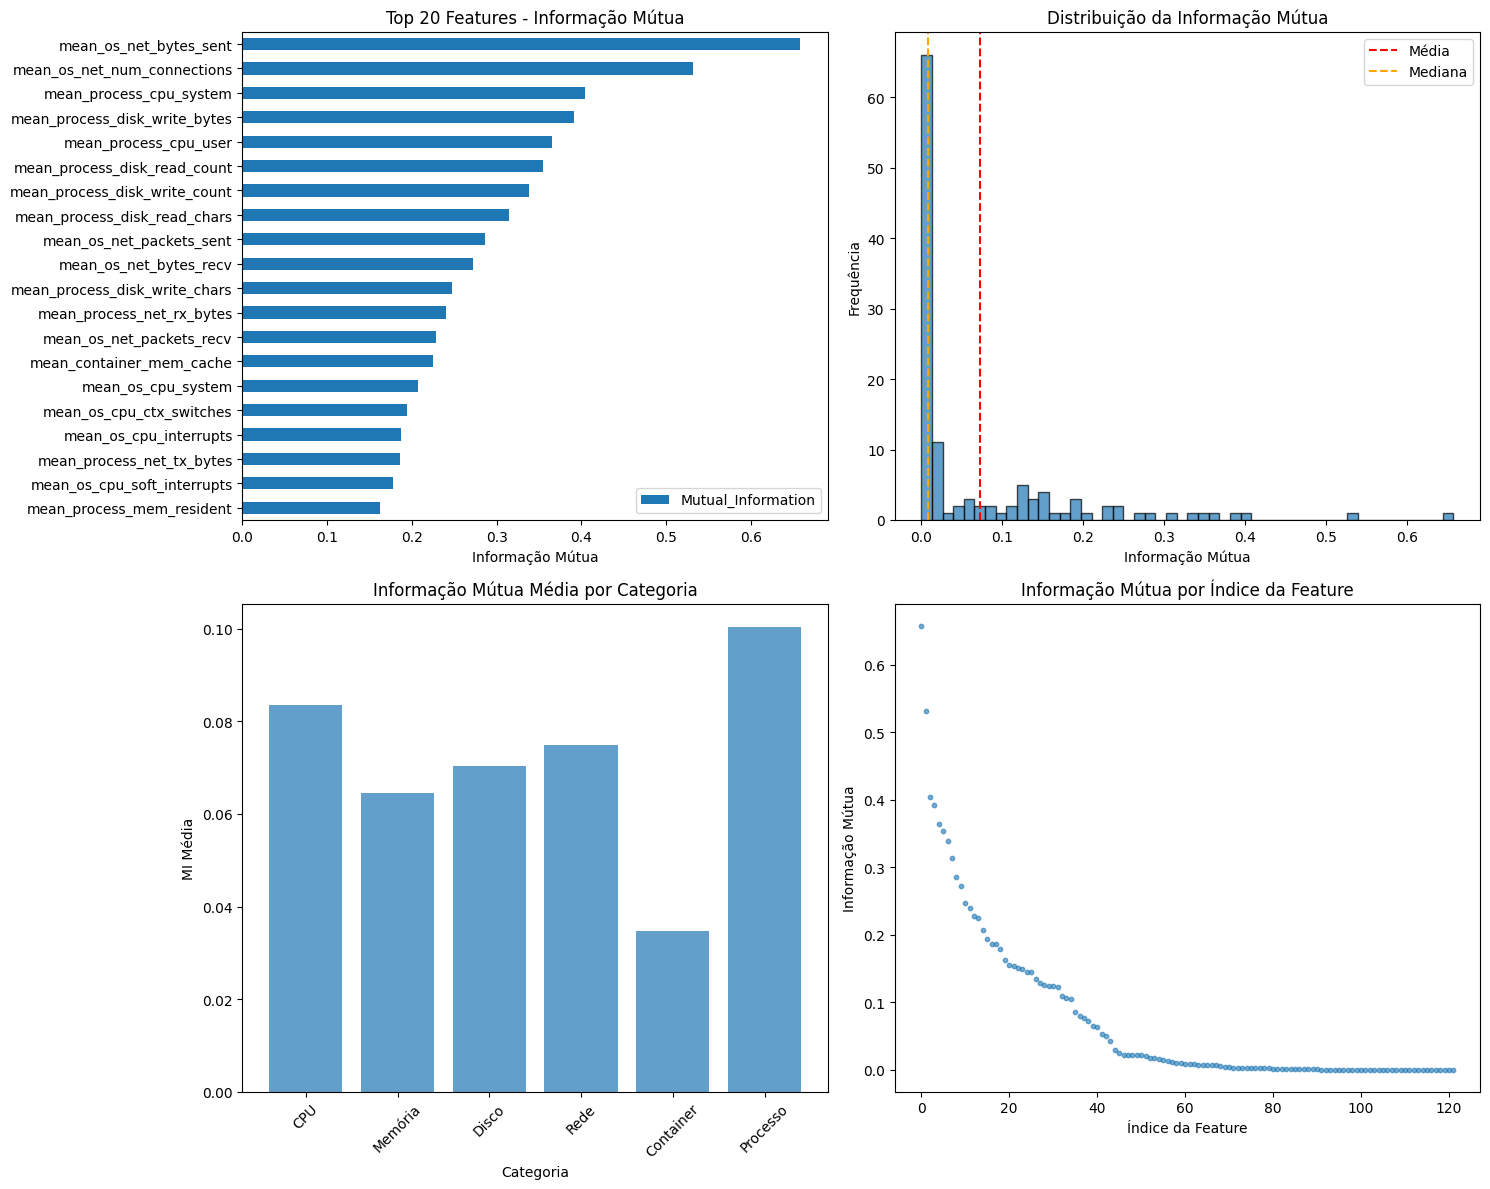

In [302]:
# Análise e visualização dos resultados
target_column = 'target'  # Substitua pelo nome real da coluna alvo
if target_column is not None and 'mi_results' in locals() and mi_results is not None:
    
    print("=== RESULTADOS DO GANHO DE INFORMAÇÃO ===")
    
    # Top 20 features com maior informação mútua
    print("\n🏆 TOP 20 FEATURES - INFORMAÇÃO MÚTUA:")
    top_20_mi = mi_results.head(20)
    for i, (_, row) in enumerate(top_20_mi.iterrows(), 1):
        print(f"{i:2d}. {row['Feature']:<50} | MI: {row['Mutual_Information']:.6f}")
    
    # Estatísticas gerais
    print(f"\n📊 ESTATÍSTICAS GERAIS:")
    print(f"• Total de features analisadas: {len(mi_results)}")
    print(f"• Informação Mútua média: {mi_results['Mutual_Information'].mean():.6f}")
    print(f"• Informação Mútua mediana: {mi_results['Mutual_Information'].median():.6f}")
    print(f"• Desvio padrão: {mi_results['Mutual_Information'].std():.6f}")
    print(f"• Features com MI > 0.01: {(mi_results['Mutual_Information'] > 0.01).sum()}")
    print(f"• Features com MI > 0.1: {(mi_results['Mutual_Information'] > 0.1).sum()}")
    
    # Visualizações
    plt.figure(figsize=(15, 12))
    
    # 1. Top 20 features
    plt.subplot(2, 2, 1)
    top_20_mi.plot(x='Feature', y='Mutual_Information', kind='barh', ax=plt.gca())
    plt.title('Top 20 Features - Informação Mútua')
    plt.xlabel('Informação Mútua')
    plt.ylabel('')
    plt.gca().invert_yaxis()
    
    # 2. Distribuição dos valores de MI
    plt.subplot(2, 2, 2)
    plt.hist(mi_results['Mutual_Information'], bins=50, alpha=0.7, edgecolor='black')
    plt.axvline(mi_results['Mutual_Information'].mean(), color='red', linestyle='--', label='Média')
    plt.axvline(mi_results['Mutual_Information'].median(), color='orange', linestyle='--', label='Mediana')
    plt.title('Distribuição da Informação Mútua')
    plt.xlabel('Informação Mútua')
    plt.ylabel('Frequência')
    plt.legend()
    
    # 3. Análise por categoria de métrica
    print(f"\n📋 ANÁLISE POR CATEGORIA:")
    
    categorias = {
        'CPU': [col for col in mi_results['Feature'] if 'cpu' in col.lower()],
        'Memória': [col for col in mi_results['Feature'] if 'mem' in col.lower()],
        'Disco': [col for col in mi_results['Feature'] if 'disk' in col.lower()],
        'Rede': [col for col in mi_results['Feature'] if 'net' in col.lower()],
        'Container': [col for col in mi_results['Feature'] if 'container' in col.lower()],
        'Processo': [col for col in mi_results['Feature'] if 'process' in col.lower()]
    }
    
    categoria_scores = {}
    for categoria, features_cat in categorias.items():
        if features_cat:
            scores = mi_results[mi_results['Feature'].isin(features_cat)]['Mutual_Information']
            categoria_scores[categoria] = {
                'count': len(scores),
                'mean': scores.mean(),
                'max': scores.max(),
                'top_feature': mi_results[mi_results['Feature'].isin(features_cat)].iloc[0]['Feature'] if len(scores) > 0 else 'N/A'
            }
            print(f"• {categoria}: {len(scores)} features | Média MI: {scores.mean():.6f} | Max: {scores.max():.6f}")
    
    # 4. MI por categoria
    plt.subplot(2, 2, 3)
    if categoria_scores:
        cats = list(categoria_scores.keys())
        means = [categoria_scores[cat]['mean'] for cat in cats]
        plt.bar(cats, means, alpha=0.7)
        plt.title('Informação Mútua Média por Categoria')
        plt.xlabel('Categoria')
        plt.ylabel('MI Média')
        plt.xticks(rotation=45)
    
    # 5. Scatter plot: MI vs Feature Index
    plt.subplot(2, 2, 4)
    plt.scatter(range(len(mi_results)), mi_results['Mutual_Information'], alpha=0.6, s=10)
    plt.title('Informação Mútua por Índice da Feature')
    plt.xlabel('Índice da Feature')
    plt.ylabel('Informação Mútua')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("❌ Resultados não disponíveis para visualização")

## 🚀 Aplicação Prática das Features Selecionadas

Esta seção demonstra como aplicar os resultados da análise de ganho de informação e mutual information na prática, criando datasets reduzidos e fornecendo exemplos de uso em Machine Learning.

In [303]:
# 1. Criação de Datasets Reduzidos com Features Selecionadas
print("📊 CRIAÇÃO DE DATASETS REDUZIDOS")
print("="*70)

# Verificar se os resultados necessários existem
required_vars = ['ig_results', 'mi_results', 'selection_results']
missing_vars = [var for var in required_vars if var not in globals()]

if missing_vars:
    print(f"❌ Variáveis necessárias não encontradas: {missing_vars}")
    print("   Execute primeiro as células de análise de ganho de informação!")
else:
    print("✅ Todas as variáveis necessárias encontradas!")
    
    # Usar estratégia recomendada (acima da mediana)
    if 'selection_results' in globals() and 'above_median' in selection_results:
        selected_features = selection_results['above_median']['both_criteria']
        strategy_used = 'above_median'
    else:
        # Fallback: usar top 25% das features por MI
        print("⚠️ Usando estratégia de fallback: top 25% por Mutual Information")
        top_25_count = max(1, len(mi_results) // 4)  # Pelo menos 1 feature
        selected_features = mi_results.head(top_25_count)['Feature'].tolist()
        strategy_used = 'top_25_percent_mi'
    
    print(f"\n🎯 Estratégia utilizada: {strategy_used}")
    print(f"📊 Features selecionadas: {len(selected_features)}")
    print(f"📊 Features originais: {X.shape[1]}")
    print(f"📉 Redução: {(1 - len(selected_features)/X.shape[1])*100:.1f}%")
    
    # Criar datasets reduzidos
    if len(selected_features) > 0:
        print(f"\n🔨 Criando datasets reduzidos...")
        
        # Dataset principal reduzido
        X_selected = X[selected_features].copy()
        
        # Datasets de treinamento reduzidos
        if isinstance(datasets['X_train'], pd.DataFrame):
            # Se X_train é DataFrame
            available_features = [f for f in selected_features if f in datasets['X_train'].columns]
            X_train_selected = datasets['X_train'][available_features].copy()
            X_test_selected = datasets['X_test'][available_features].copy() if 'X_test' in globals() else None
            X_val_selected = datasets['X_val'][available_features].copy() if 'X_val' in globals() else None
        else:
            # Se X_train é numpy array, usar índices
            if hasattr(X, 'columns'):
                feature_indices = [i for i, col in enumerate(X.columns) if col in selected_features]
                X_train_selected = datasets['X_train'][:, feature_indices]
                X_test_selected = datasets['X_test'][:, feature_indices] if 'X_test' in globals() else None
                X_val_selected = datasets['X_val'][:, feature_indices] if 'X_val' in globals() else None
            else:
                print("⚠️ Não foi possível criar versões numpy dos datasets de treino")
                X_train_selected = None
                X_test_selected = None
                X_val_selected = None
        
        print(f"✅ Datasets reduzidos criados:")
        print(f"   • X_selected shape: {X_selected.shape}")
        if X_train_selected is not None:
            print(f"   • X_train_selected shape: {X_train_selected.shape}")
        if X_test_selected is not None:
            print(f"   • X_test_selected shape: {X_test_selected.shape}")
        if X_val_selected is not None:
            print(f"   • X_val_selected shape: {X_val_selected.shape}")
        
        # Criar summary das features selecionadas
        print(f"\n📋 Criando summary das features selecionadas...")
        selected_summary_data = []
        
        for feature in selected_features:
            # Obter scores de IG e MI
            ig_score = ig_results[ig_results['Feature'] == feature]['Information_Gain'].iloc[0] if feature in ig_results['Feature'].values else 0
            mi_score = mi_results[mi_results['Feature'] == feature]['Mutual_Information'].iloc[0] if feature in mi_results['Feature'].values else 0
            
            selected_summary_data.append({
                'Feature': feature,
                'Information_Gain': ig_score,
                'Mutual_Information': mi_score,
                'Rank_IG': ig_results[ig_results['Feature'] == feature].index[0] + 1 if feature in ig_results['Feature'].values else len(ig_results) + 1,
                'Rank_MI': mi_results[mi_results['Feature'] == feature].index[0] + 1 if feature in mi_results['Feature'].values else len(mi_results) + 1
            })
        
        selected_features_summary = pd.DataFrame(selected_summary_data)
        selected_features_summary = selected_features_summary.sort_values('Information_Gain', ascending=False)
        
        print(f"✅ Summary criado com {len(selected_features_summary)} features")
        
        # Mostrar top 10 features selecionadas
        print(f"\n🏆 TOP 10 FEATURES SELECIONADAS:")
        print("-" * 70)
        for idx, row in selected_features_summary.head(10).iterrows():
            print(f"   {row['Rank_IG']:2d}. {row['Feature']:30s} | IG: {row['Information_Gain']:.6f} | MI: {row['Mutual_Information']:.6f}")
        
        # Salvar no ambiente global
        globals()['X_selected'] = X_selected
        globals()['selected_features_list'] = selected_features
        selected_features_list = selected_features  # Para exibição
        globals()['selected_features_summary'] = selected_features_summary
        if X_train_selected is not None:
            globals()['X_train_selected'] = X_train_selected
        if X_test_selected is not None:
            globals()['X_test_selected'] = X_test_selected
        if X_val_selected is not None:
            globals()['X_val_selected'] = X_val_selected
        
        print(f"\n💾 Variáveis criadas no ambiente:")
        print(f"   • X_selected: Dataset principal com features selecionadas")
        print(f"   • selected_features_list: Lista das features selecionadas")
        print(f"   • selected_features_summary: DataFrame com rankings e scores")
        if X_train_selected is not None:
            print(f"   • X_train_selected, X_test_selected, X_val_selected: Conjuntos de treino/teste/validação")
        
    else:
        print("❌ Nenhuma feature selecionada! Verifique os thresholds utilizados.")



📊 CRIAÇÃO DE DATASETS REDUZIDOS
✅ Todas as variáveis necessárias encontradas!


KeyError: 'both_criteria'

In [ ]:
# 2. Salvamento de Arquivos
print("\n💾 SALVAMENTO DE ARQUIVOS")
print("="*70)

if 'selected_features_list' in globals() and len(selected_features_list) > 0:
    try:
        import os
        import pickle
        
        # Criar diretório se não existir
        output_dir = '../dataset'
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
            print(f"📁 Diretório criado: {output_dir}")
        
        # 1. Salvar lista de features selecionadas (selected_features.txt)
        features_file = os.path.join(output_dir, 'selected_features.txt')
        with open(features_file, 'w', encoding='utf-8') as f:
            f.write(f"# Features Selecionadas - Análise de Ganho de Informação\n")
            f.write(f"# Data: {pd.Timestamp.now()}\n")
            f.write(f"# Estratégia: {strategy_used}\n")
            f.write(f"# Total de features: {len(selected_features_list)}\n")
            f.write(f"# Redução: {(1 - len(selected_features_list)/X.shape[1])*100:.1f}%\n")
            f.write(f"#\n")
            for i, feature in enumerate(selected_features_list, 1):
                f.write(f"{feature}\n")
        
        print(f"✅ {features_file}")
        print(f"   • {len(selected_features_list)} features salvas")
        
        # 2. Salvar dataset reduzido completo em pickle
        if 'X_selected' in globals():
            dataset_pickle_file = os.path.join(output_dir, f'{info_modelo['nome_dataset']}_selected_datasets.pkl')
            
            # Criar dicionário com todos os datasets selecionados
            selected_data = {
                'X_selected': X_selected,
                'y_selected' : y,
                'selected_features_list': selected_features_list,
                'selected_features_summary': selected_features_summary if 'selected_features_summary' in globals() else None,
                'strategy_used': strategy_used,
                'creation_date': pd.Timestamp.now(),
                'original_shape': X.shape,
                'selected_shape': X_selected.shape,
                'reduction_percentage': (1 - len(selected_features_list)/X.shape[1])*100
            }
            
            # Adicionar conjuntos de treino/teste/validação se disponíveis
            if 'X_train_selected' in globals() and X_train_selected is not None:
                selected_data['X_train_selected'] = X_train_selected
            if 'X_test_selected' in globals() and X_test_selected is not None:
                selected_data['X_test_selected'] = X_test_selected
            if 'X_val_selected' in globals() and X_val_selected is not None:
                selected_data['X_val_selected'] = X_val_selected
            
            # Adicionar targets se disponíveis no ambiente global
            if 'y_train' in globals():
                selected_data['y_train'] = datasets['y_train']
            if 'y_test' in globals():
                selected_data['y_test'] = datasets['y_test']
            if 'y_val' in globals():
                selected_data['y_val'] = datasets['y_val']
            if 'y' in globals():
                selected_data['y'] = y
            
            # Salvar em pickle
            with open(dataset_pickle_file, 'wb') as f:
                pickle.dump(selected_data, f)
            print(f"✅ {dataset_pickle_file}")
            print(f"   • Shape: {X_selected.shape}")
            print(f"   • Tamanho: {os.path.getsize(dataset_pickle_file) / (1024*1024):.2f} MB")
            print(f"   • Conteúdo: {len(selected_data)} objetos salvos")
        
        # 3. Salvar summary com scores em pickle separado
        if 'selected_features_summary' in globals():
            summary_pickle_file = os.path.join(output_dir, f'{info_modelo['nome_dataset']}_selected_features_summary.pkl')
            with open(summary_pickle_file, 'wb') as f:
                pickle.dump(selected_features_summary, f)
            print(f"✅ {summary_pickle_file}")
            print(f"   • {len(selected_features_summary)} features com scores e rankings")
        
        # 4. Listar conjuntos salvos no pickle principal
        saved_datasets = []
        if 'X_train_selected' in globals() and X_train_selected is not None:
            saved_datasets.append(f"X_train_selected ({X_train_selected.shape})")
        if 'X_test_selected' in globals() and X_test_selected is not None:
            saved_datasets.append(f"X_test_selected ({X_test_selected.shape})")
        if 'X_val_selected' in globals() and X_val_selected is not None:
            saved_datasets.append(f"X_val_selected ({X_val_selected.shape})")
        
        if saved_datasets:
            print(f"✅ Conjuntos treino/teste/validação (no pickle principal):")
            for dataset_info in saved_datasets:
                print(f"   • {dataset_info}")
        
        # 5. Criar arquivo README com informações atualizadas
        readme_file = os.path.join(output_dir, f'{info_modelo['nome_dataset']}_README_selected_features.md')
        with open(readme_file, 'w', encoding='utf-8') as f:
            f.write("# Features Selecionadas - Análise de Ganho de Informação\n\n")
            f.write(f"**Data de criação:** {pd.Timestamp.now()}\n\n")
            f.write(f"**Estratégia utilizada:** {strategy_used}\n\n")
            f.write(f"## Resumo\n\n")
            f.write(f"- **Features originais:** {X.shape[1]}\n")
            f.write(f"- **Features selecionadas:** {len(selected_features_list)}\n")
            f.write(f"- **Redução:** {(1 - len(selected_features_list)/X.shape[1])*100:.1f}%\n\n")
            
            f.write(f"## Arquivos Gerados\n\n")
            f.write(f"1. **selected_features.txt** - Lista simples das features selecionadas\n")
            f.write(f"2. **selected_datasets.pkl** - Arquivo pickle com todos os datasets reduzidos e metadados\n")
            f.write(f"3. **selected_features_summary.pkl** - Scores e rankings detalhados das features (pickle)\n")
            f.write(f"4. **README_selected_features.md** - Este arquivo de documentação\n")
            
            f.write(f"\n## Conteúdo do Arquivo Pickle Principal\n\n")
            f.write(f"O arquivo `selected_datasets.pkl` contém:\n")
            f.write(f"- **X_selected**: Dataset principal com features selecionadas\n")
            f.write(f"- **selected_features_list**: Lista das features selecionadas\n")
            f.write(f"- **selected_features_summary**: DataFrame com scores e rankings\n")
            if saved_datasets:
                f.write(f"- **Conjuntos treino/teste/validação**: Versões reduzidas dos conjuntos\n")
            f.write(f"- **Metadados**: Estratégia usada, data de criação, informações de redução\n")
            
            f.write(f"\n## Top 10 Features\n\n")
            f.write(f"| Rank | Feature | Information Gain | Mutual Information |\n")
            f.write(f"|------|---------|------------------|--------------------|\n")
            if 'selected_features_summary' in globals():
                for idx, row in selected_features_summary.head(10).iterrows():
                    f.write(f"| {row['Rank_IG']:2d} | {row['Feature']} | {row['Information_Gain']:.6f} | {row['Mutual_Information']:.6f} |\n")
            
            f.write(f"\n## Como Usar\n\n")
            f.write(f"```python\n")
            f.write(f"import pandas as pd\n")
            f.write(f"import numpy as np\n")
            f.write(f"import pickle\n\n")
            f.write(f"# Carregar features selecionadas (texto)\n")
            f.write(f"with open('selected_features.txt', 'r') as f:\n")
            f.write(f"    selected_features = [line.strip() for line in f if not line.startswith('#') and line.strip()]\n\n")
            f.write(f"# Carregar todos os datasets e metadados (pickle)\n")
            f.write(f"with open('selected_datasets.pkl', 'rb') as f:\n")
            f.write(f"    data = pickle.load(f)\n\n")
            f.write(f"# Acessar datasets\n")
            f.write(f"X_selected = data['X_selected']\n")
            f.write(f"selected_features = data['selected_features_list']\n")
            f.write(f"summary = data['selected_features_summary']\n\n")
            f.write(f"# Acessar conjuntos de treino/teste (se disponíveis)\n")
            f.write(f"if 'X_train_selected' in data:\n")
            f.write(f"    X_train_selected = data['X_train_selected']\n")
            f.write(f"    y_train = data.get('y_train', None)\n\n")
            f.write(f"# Carregar summary separado (pickle)\n")
            f.write(f"with open('selected_features_summary.pkl', 'rb') as f:\n")
            f.write(f"    summary_df = pickle.load(f)\n")
            f.write(f"```\n")
        
        print(f"✅ {readme_file}")
        print(f"   • Documentação completa criada")
        
        print(f"\n📊 RESUMO DE ARQUIVOS SALVOS:")
        print(f"   • Total de arquivos: 4 (TXT + PKL principal + PKL summary + README)")
        print(f"   • Formato principal: Pickle (mais eficiente e preserva tipos)")
        print(f"   • Diretório: {os.path.abspath(output_dir)}")
        
        print(f"\n🔍 VANTAGENS DO FORMATO PICKLE:")
        print(f"   • Preserva tipos de dados originais (DataFrame, numpy arrays)")
        print(f"   • Carregamento mais rápido que CSV")
        print(f"   • Menor tamanho de arquivo")
        print(f"   • Suporte nativo a objetos Python complexos")
        print(f"   • Metadados incluídos no mesmo arquivo")
        
    except Exception as e:
        print(f"❌ Erro ao salvar arquivos: {e}")
        print(f"   Verifique permissões de escrita no diretório {output_dir}")

else:
    print("❌ Nenhuma feature selecionada para salvar!")


💾 SALVAMENTO DE ARQUIVOS
✅ ../dataset\selected_features.txt
   • 52 features salvas
✅ ../dataset\svm_selected_datasets.pkl
   • Shape: (32259, 52)
   • Tamanho: 26.09 MB
   • Conteúdo: 11 objetos salvos
✅ ../dataset\svm_selected_features_summary.pkl
   • 52 features com scores e rankings
✅ Conjuntos treino/teste/validação (no pickle principal):
   • X_train_selected ((32259, 52))
✅ ../dataset\svm_README_selected_features.md
   • Documentação completa criada

📊 RESUMO DE ARQUIVOS SALVOS:
   • Total de arquivos: 4 (TXT + PKL principal + PKL summary + README)
   • Formato principal: Pickle (mais eficiente e preserva tipos)
   • Diretório: d:\Pessoal\leopiresss\leopi\OneDrive - STJ- Superior Tribunal de Justiça\AIA\Cursos\Mestrado\Projeto Final\analise_kubemon\dataset

🔍 VANTAGENS DO FORMATO PICKLE:
   • Preserva tipos de dados originais (DataFrame, numpy arrays)
   • Carregamento mais rápido que CSV
   • Menor tamanho de arquivo
   • Suporte nativo a objetos Python complexos
   • Metadad

In [ ]:

import lib_analise
datasets['X_train'] = datasets['X_train'][selected_features]
datasets['X_test'] = datasets['X_test'][selected_features]
datasets['X_val'] = datasets['X_val'][selected_features]
print(len(selected_features))
datasets['features_ganho_informacao'] = selected_features if 'selected_features' in globals() else None
lib_analise.save_informacao_analise(datasets=datasets)
lib_analise.print_informacao_analise()

52
✅ Dataset salvo com sucesso em ../dataset/svm.pkl
X_train.shape (32259, 52)
X_test.shape (24194, 52)
X_val.shape (24195, 52)
X_train_scaled.shape None
X_test_scaled.shape None
X_val_scaled.shape None
classes_mapping {'interf': np.int64(0), 'normal': np.int64(1)}
features_ganho_informacao ['mean_os_cpu_ctx_switches', 'mean_os_mem_nr_inactive_file', 'mean_os_disk_write_io', 'mean_os_mem_pgpgin', 'mean_container_mem_active_file', 'mean_process_net_tx_bytes', 'mean_container_cpu_user', 'mean_process_disk_write_count', 'mean_container_mem_active_anon', 'mean_process_net_rx_bytes', 'mean_os_cpu_soft_interrupts', 'mean_os_net_bytes_recv', 'mean_container_mem_inactive_file', 'mean_os_net_packets_sent', 'mean_os_disk_write_sectors', 'mean_os_cpu_idle', 'mean_os_cpu_system', 'mean_os_disk_write_merge', 'mean_container_mem_rss', 'mean_os_disk_io_ticks', 'mean_process_mem_data', 'mean_container_net_rx_bytes', 'mean_os_net_packets_recv', 'mean_os_cpu_user', 'mean_process_disk_read_chars', 'mean_

{'X_train':        mean_os_cpu_ctx_switches  mean_os_mem_nr_inactive_file  \
 7604                    19147.0                          41.0   
 59824                  179540.0                         893.0   
 68249                   23005.0                         269.0   
 23816                   26245.0                       12290.0   
 33886                   17678.0                         298.0   
 ...                         ...                           ...   
 40008                   91084.0                      -16771.0   
 54639                   23150.0                           5.0   
 48314                   16879.0                        -312.0   
 10893                   12860.0                         310.0   
 29578                   13783.0                         300.0   
 
        mean_os_disk_write_io  mean_os_mem_pgpgin  \
 7604                    33.0                 0.0   
 59824                    2.0                 0.0   
 68249                   50.0       

In [ ]:
# 3. Exemplos de Uso em Machine Learning
print("\n🤖 EXEMPLOS DE USO EM MACHINE LEARNING")
print("="*70)

if 'X_selected' in globals() and 'y' in globals():
    
    print("📚 Exemplo 1: Comparação de Performance - Dataset Completo vs Reduzido")
    print("-" * 60)
    
    # Código de exemplo para comparar performance
    example_code_1 = '''
# Importações necessárias
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import time

# 1. Dataset completo
print("🔍 Testando dataset completo...")
X_full = X  # Todas as features
y_target = y

# Divisão treino/teste
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(
    X_full, y_target, test_size=0.2, random_state=42, stratify=y_target
)

# Treinamento com dataset completo
start_time = time.time()
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(X_full_train, y_full_train)
full_train_time = time.time() - start_time

# Predição com dataset completo
y_full_pred = rf_full.predict(X_full_test)
full_accuracy = accuracy_score(y_full_test, y_full_pred)

print(f"   • Features: {X_full.shape[1]}")
print(f"   • Tempo de treino: {full_train_time:.2f}s")
print(f"   • Acurácia: {full_accuracy:.4f}")

# 2. Dataset reduzido
print("\\n🎯 Testando dataset reduzido...")
X_reduced = X_selected  # Apenas features selecionadas
y_target = y

# Divisão treino/teste
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(
    X_reduced, y_target, test_size=0.2, random_state=42, stratify=y_target
)

# Treinamento com dataset reduzido
start_time = time.time()
rf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reduced.fit(X_red_train, y_red_train)
reduced_train_time = time.time() - start_time

# Predição com dataset reduzido
y_red_pred = rf_reduced.predict(X_red_test)
reduced_accuracy = accuracy_score(y_red_test, y_red_pred)

print(f"   • Features: {X_reduced.shape[1]}")
print(f"   • Tempo de treino: {reduced_train_time:.2f}s")
print(f"   • Acurácia: {reduced_accuracy:.4f}")

# 3. Comparação
print("\\n📊 COMPARAÇÃO DE RESULTADOS:")
print(f"   • Redução de features: {(1 - X_reduced.shape[1]/X_full.shape[1])*100:.1f}%")
print(f"   • Speedup no treino: {full_train_time/reduced_train_time:.2f}x")
print(f"   • Diferença de acurácia: {(reduced_accuracy - full_accuracy)*100:.2f}%")
'''
    
    print("💡 CÓDIGO EXEMPLO 1 (copie e execute em uma nova célula):")
    print(example_code_1)
    
    print("\n" + "-" * 60)
    print("📚 Exemplo 2: Pipeline Completo com Features Selecionadas")
    print("-" * 60)
    
    example_code_2 = '''
# Pipeline completo com validação cruzada
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np

# Definir modelos para testar
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Configurar validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Testar cada modelo com features selecionadas
print("🧪 Testando modelos com features selecionadas...")
results = {}

for model_name, model in models.items():
    # Criar pipeline com normalização
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    # Validação cruzada
    cv_scores = cross_val_score(pipeline, X_selected, y, cv=cv, scoring='accuracy')
    
    results[model_name] = {
        'mean_accuracy': cv_scores.mean(),
        'std_accuracy': cv_scores.std(),
        'scores': cv_scores
    }
    
    print(f"   • {model_name:20s}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Encontrar melhor modelo
best_model = max(results.keys(), key=lambda k: results[k]['mean_accuracy'])
print(f"\\n🏆 Melhor modelo: {best_model}")
print(f"   • Acurácia: {results[best_model]['mean_accuracy']:.4f} ± {results[best_model]['std_accuracy']:.4f}")
'''
    
    print("💡 CÓDIGO EXEMPLO 2 (copie e execute em uma nova célula):")
    print(example_code_2)
    
    print("\n" + "-" * 60)
    print("📚 Exemplo 3: Carregamento e Uso dos Arquivos Salvos")
    print("-" * 60)
    
    example_code_3 = '''
# Como carregar e usar os arquivos salvos (FORMATO PICKLE)
import pandas as pd
import numpy as np
import pickle

# 1. Carregar lista de features selecionadas (texto)
def load_selected_features(filename='../dataset/selected_features.txt'):
    with open(filename, 'r', encoding='utf-8') as f:
        features = []
        for line in f:
            line = line.strip()
            # Ignorar linhas de comentário e vazias
            if line and not line.startswith('#'):
                features.append(line)
    return features

# 2. Carregar todos os datasets e metadados (pickle principal)
def load_selected_datasets(filename='../dataset/selected_datasets.pkl'):
    with open(filename, 'rb') as f:
        return pickle.load(f)

# 3. Carregar summary das features (pickle separado)
def load_features_summary(filename='../dataset/selected_features_summary.pkl'):
    with open(filename, 'rb') as f:
        return pickle.load(f)

# Exemplo de uso
try:
    # Carregar dados
    selected_features = load_selected_features()  # Lista de features (TXT)
    data = load_selected_datasets()  # Todos os datasets (PICKLE)
    features_summary = load_features_summary()  # Summary (PICKLE)
    
    # Extrair dados do pickle
    X_reduced_loaded = data['X_selected']
    metadata = {
        'strategy': data['strategy_used'],
        'creation_date': data['creation_date'],
        'reduction': data['reduction_percentage']
    }
    
    print(f"✅ Dados carregados com sucesso!")
    print(f"   • Features selecionadas: {len(selected_features)}")
    print(f"   • Shape do dataset: {X_reduced_loaded.shape}")
    print(f"   • Estratégia usada: {metadata['strategy']}")
    print(f"   • Redução: {metadata['reduction']:.1f}%")
    
    # Verificar se há conjuntos de treino/teste
    if 'X_train_selected' in data:
        print(f"   • Treino disponível: {data['X_train_selected'].shape}")
    if 'X_test_selected' in data:
        print(f"   • Teste disponível: {data['X_test_selected'].shape}")
    
    print(f"   • Top 5 features por IG:")
    for idx, row in features_summary.head(5).iterrows():
        print(f"     {idx+1}. {row['Feature']} (IG: {row['Information_Gain']:.6f})")
        
except FileNotFoundError as e:
    print(f"❌ Arquivo não encontrado: {e}")
    print("   Execute primeiro a célula de salvamento de arquivos!")
except Exception as e:
    print(f"❌ Erro ao carregar pickle: {e}")
    print("   Verifique se os arquivos foram salvos corretamente!")

# 4. Aplicar seleção de features em novos dados
def apply_feature_selection(new_data, selected_features):
    """
    Aplica a seleção de features em um novo dataset
    """
    available_features = [f for f in selected_features if f in new_data.columns]
    missing_features = [f for f in selected_features if f not in new_data.columns]
    
    if missing_features:
        print(f"⚠️ Features não encontradas: {len(missing_features)}")
        print(f"   Usando {len(available_features)} de {len(selected_features)} features")
    
    return new_data[available_features]

# Exemplo de uso com novos dados
# new_X_reduced = apply_feature_selection(new_dataset, selected_features)
'''
    
    print("💡 CÓDIGO EXEMPLO 3 (copie e execute em uma nova célula):")
    print(example_code_3)
    
    print(f"\n🎯 PRÓXIMOS PASSOS RECOMENDADOS:")
    print("=" * 50)
    print("1. 📊 Execute os exemplos acima em células separadas")
    print("2. 🔍 Compare performance entre dataset completo e reduzido")
    print("3. 🧪 Teste diferentes algoritmos com as features selecionadas")
    print("4. 📈 Analise feature importance dos modelos treinados")
    print("5. 🔄 Ajuste thresholds se necessário para melhor performance")
    print("6. 💾 Documente os resultados para uso futuro")
    
    print(f"\n✨ VARIÁVEIS DISPONÍVEIS NO AMBIENTE:")
    available_vars = []
    for var_name in ['X_selected', 'selected_features_list', 'selected_features_summary', 
                     'X_train_selected', 'X_test_selected', 'X_val_selected']:
        if var_name in globals():
            available_vars.append(var_name)
    
    for var in available_vars:
        var_obj = globals()[var]
        if hasattr(var_obj, 'shape'):
            print(f"   • {var}: shape {var_obj.shape}")
        else:
            print(f"   • {var}: {type(var_obj).__name__} com {len(var_obj)} itens")

else:
    print("❌ Datasets necessários não encontrados!")
    print("   Execute primeiro as células anteriores para criar X_selected e y")


🤖 EXEMPLOS DE USO EM MACHINE LEARNING
📚 Exemplo 1: Comparação de Performance - Dataset Completo vs Reduzido
------------------------------------------------------------
💡 CÓDIGO EXEMPLO 1 (copie e execute em uma nova célula):

# Importações necessárias
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import time

# 1. Dataset completo
print("🔍 Testando dataset completo...")
X_full = X  # Todas as features
y_target = y

# Divisão treino/teste
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(
    X_full, y_target, test_size=0.2, random_state=42, stratify=y_target
)

# Treinamento com dataset completo
start_time = time.time()
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(X_full_train, y_full_train)
full_train_time = time.time() - start_time

# Pre

TypeError: object of type 'NoneType' has no len()

In [ ]:
# 4. Demonstração de Carregamento dos Arquivos Pickle
print("\n📦 DEMONSTRAÇÃO DE CARREGAMENTO DOS ARQUIVOS PICKLE")
print("="*70)

# Simulação de como carregar os arquivos salvos
try:
    import pickle
    import os
    
    # Verificar se os arquivos existem
    pickle_file = f'../dataset/{info_modelo['nome_dataset']}_selected_datasets.pkl'
    summary_file = f'../dataset/{info_modelo['nome_dataset']}_selected_features_summary.pkl'
    features_file = f'../dataset/{info_modelo['nome_dataset']}_selected_features.txt'

    files_exist = {
        'pickle_principal': os.path.exists(pickle_file),
        'pickle_summary': os.path.exists(summary_file),
        'features_txt': os.path.exists(features_file)
    }
    
    print("🔍 Verificando arquivos salvos:")
    for file_type, exists in files_exist.items():
        status = "✅ Existe" if exists else "❌ Não encontrado"
        print(f"   • {file_type}: {status}")
    
    if files_exist['pickle_principal']:
        print(f"\n📊 CARREGANDO ARQUIVO PICKLE PRINCIPAL...")
        
        # Carregar arquivo pickle principal
        with open(pickle_file, 'rb') as f:
            loaded_data = pickle.load(f)
        
        print(f"✅ Arquivo carregado com sucesso!")
        print(f"   • Chaves disponíveis: {list(loaded_data.keys())}")
        print(f"   • Estratégia usada: {loaded_data.get('strategy_used', 'N/A')}")
        print(f"   • Data de criação: {loaded_data.get('creation_date', 'N/A')}")
        print(f"   • Redução: {loaded_data.get('reduction_percentage', 0):.1f}%")
        
        # Verificar datasets disponíveis
        X_loaded = loaded_data.get('X_selected', None)
        if X_loaded is not None:
            print(f"   • X_selected shape: {X_loaded.shape}")
        
        if 'X_train_selected' in loaded_data:
            print(f"   • X_train_selected shape: {loaded_data['X_train_selected'].shape}")
        
        if 'X_test_selected' in loaded_data:
            print(f"   • X_test_selected shape: {loaded_data['X_test_selected'].shape}")
        
        if 'X_val_selected' in loaded_data:
            print(f"   • X_val_selected shape: {loaded_data['X_val_selected'].shape}")
        
        # Mostrar features selecionadas
        features_from_pickle = loaded_data.get('selected_features_list', [])
        print(f"   • Features selecionadas: {len(features_from_pickle)}")
        if len(features_from_pickle) > 0:
            print(f"   • Primeiras 5 features: {features_from_pickle[:5]}")
    
    if files_exist['pickle_summary']:
        print(f"\n📋 CARREGANDO SUMMARY (PICKLE)...")
        
        # Carregar summary
        with open(summary_file, 'rb') as f:
            summary_loaded = pickle.load(f)
        
        print(f"✅ Summary carregado!")
        print(f"   • Tipo: {type(summary_loaded)}")
        print(f"   • Shape: {summary_loaded.shape}")
        print(f"   • Colunas: {list(summary_loaded.columns)}")
        
        # Top 3 features
        print(f"\n🏆 TOP 3 FEATURES (do pickle):")
        for idx, row in summary_loaded.head(3).iterrows():
            print(f"   {idx+1}. {row['Feature']}")
            print(f"      • IG: {row['Information_Gain']:.6f}")
            print(f"      • MI: {row['Mutual_Information']:.6f}")
    
    if files_exist['features_txt']:
        print(f"\n📄 CARREGANDO LISTA DE FEATURES (TXT)...")
        
        # Carregar lista simples
        with open(features_file, 'r', encoding='utf-8') as f:
            features_txt = []
            for line in f:
                line = line.strip()
                if line and not line.startswith('#'):
                    features_txt.append(line)
        
        print(f"✅ Lista carregada!")
        print(f"   • Total de features: {len(features_txt)}")
        if len(features_txt) > 0:
            print(f"   • Primeiras 3: {features_txt[:3]}")
    
    print(f"\n💡 CÓDIGO DE EXEMPLO PARA USO:")
    print("-" * 50)
    example_usage = '''
# Exemplo completo de carregamento
import pickle
import pandas as pd

# Carregar todos os dados
with open('../dataset/selected_datasets.pkl', 'rb') as f:
    data = pickle.load(f)

# Extrair datasets
X_selected = data['X_selected']
X_train_selected = data.get('X_train_selected', None)
y_train = data.get('y_train', None)

# Usar em ML
from sklearn.ensemble import RandomForestClassifier
if X_train_selected is not None and y_train is not None:
    rf = RandomForestClassifier()
    rf.fit(X_train_selected, y_train)
    print(f"Modelo treinado com {X_train_selected.shape[1]} features!")
'''
    print(example_usage)
    
except Exception as e:
    print(f"❌ Erro na demonstração: {e}")
    print("   Execute primeiro a célula de salvamento para criar os arquivos pickle!")

print(f"\n🚀 PRÓXIMOS PASSOS:")
print("1. Execute a célula de salvamento (célula anterior)")
print("2. Execute esta célula para verificar o carregamento")
print("3. Use os exemplos de código para trabalhar com os dados")
print("4. Aproveite os benefícios do formato pickle! 🎉")


📦 DEMONSTRAÇÃO DE CARREGAMENTO DOS ARQUIVOS PICKLE
🔍 Verificando arquivos salvos:
   • pickle_principal: ✅ Existe
   • pickle_summary: ✅ Existe
   • features_txt: ❌ Não encontrado

📊 CARREGANDO ARQUIVO PICKLE PRINCIPAL...
✅ Arquivo carregado com sucesso!
   • Chaves disponíveis: ['X_selected', 'y_selected', 'selected_features_list', 'selected_features_summary', 'strategy_used', 'creation_date', 'original_shape', 'selected_shape', 'reduction_percentage', 'X_train_selected', 'X_test_selected', 'X_val_selected', 'y_train', 'y_test', 'y_val', 'y']
   • Estratégia usada: above_median
   • Data de criação: 2025-10-13 16:15:26.414423
   • Redução: 55.1%
   • X_selected shape: (32259, 48)
   • X_train_selected shape: (32259, 48)
   • X_test_selected shape: (24194, 48)
   • X_val_selected shape: (24195, 48)
   • Features selecionadas: 48
   • Primeiras 5 features: ['mean_os_disk_read_io', 'mean_os_mem_pgfree', 'mean_container_mem_pgfault', 'mean_container_net_rx_bytes', 'mean_container_cpu_use

In [ ]:

datasets = lib_analise.get_dataset_analise(analise_ganho_de_informacao=False)
lib_analise.print_informacao_analise()



X_train.shape (32259, 107)
X_test.shape (24194, 107)
X_val.shape (24195, 107)
X_train_scaled.shape None
X_test_scaled.shape None
X_val_scaled.shape None
classes_mapping {'interf': np.int64(0), 'normal': np.int64(1)}
features_ganho_informacao ['mean_os_disk_read_io', 'mean_os_mem_pgfree', 'mean_container_mem_pgfault', 'mean_container_net_rx_bytes', 'mean_container_cpu_user', 'mean_os_cpu_softirq', 'mean_os_disk_write_ticks', 'mean_process_mem_data', 'mean_container_mem_active_anon', 'mean_process_disk_write_chars', 'mean_container_mem_inactive_file', 'mean_os_disk_read_sectors', 'mean_process_disk_read_chars', 'mean_container_cpu_system', 'mean_os_cpu_idle', 'mean_os_disk_time_in_queue', 'mean_os_disk_write_io', 'mean_process_net_rx_bytes', 'mean_process_net_rx_packets', 'mean_container_net_rx_packets', 'mean_os_net_bytes_sent', 'mean_os_mem_pgfault', 'mean_container_mem_cache', 'mean_os_mem_nr_mapped', 'mean_os_disk_write_sectors', 'mean_os_cpu_user', 'mean_os_cpu_interrupts', 'mean_os

{'nome_dataset': 'svm',
 'X_train':        mean_os_cpu_ctx_switches  mean_os_cpu_guest  mean_os_cpu_guest_nice  \
 7604                    19147.0                0.0                     0.0   
 59824                  179540.0                0.0                     0.0   
 68249                   23005.0                0.0                     0.0   
 23816                   26245.0                0.0                     0.0   
 33886                   17678.0                0.0                     0.0   
 ...                         ...                ...                     ...   
 40008                   91084.0                0.0                     0.0   
 54639                   23150.0                0.0                     0.0   
 48314                   16879.0                0.0                     0.0   
 10893                   12860.0                0.0                     0.0   
 29578                   13783.0                0.0                     0.0   
 
        mean_os

## 📊 Exportação dos Resultados para Excel

Salva os resultados de Information Gain e Mutual Information em uma planilha Excel com abas separadas para análise posterior.

In [ ]:
# 📊 Exportação dos Resultados para Planilha Excel
print("📋 SALVANDO RESULTADOS EM PLANILHA EXCEL")
print("="*70)

# Verificar se os resultados estão disponíveis
if 'ig_results' in locals() and 'mi_results' in locals():
    
    import pandas as pd
    import os
    from datetime import datetime
    
    try:
        # Criar diretório de saída se não existir
        output_dir = '../dataset'
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
            print(f"📁 Diretório criado: {output_dir}")
        
        # Nome do arquivo Excel com timestamp
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        excel_filename = f"analise_feature_selection_{timestamp}.xlsx"
        excel_path = os.path.join(output_dir, excel_filename)
        
        # Criar writer do pandas para Excel
        print("💾 Preparando planilha Excel...")
        with pd.ExcelWriter(excel_path, engine='openpyxl') as writer:
            
            # Aba 1: Information Gain
            print("   📊 Salvando Information Gain...")
            ig_results_copy = ig_results.copy()
            
            # Adicionar estatísticas resumidas no IG
            ig_stats = pd.DataFrame({
                'Estatística': ['Total Features', 'Média', 'Mediana', 'Desvio Padrão', 
                               'Mínimo', 'Máximo', 'Q1 (25%)', 'Q3 (75%)', 'Q90 (Top 10%)'],
                'Valor': [
                    len(ig_results),
                    ig_results['Information_Gain'].mean(),
                    ig_results['Information_Gain'].median(), 
                    ig_results['Information_Gain'].std(),
                    ig_results['Information_Gain'].min(),
                    ig_results['Information_Gain'].max(),
                    ig_results['Information_Gain'].quantile(0.25),
                    ig_results['Information_Gain'].quantile(0.75),
                    ig_results['Information_Gain'].quantile(0.90)
                ]
            })
            
            # Adicionar ranking
            ig_results_copy['Ranking'] = range(1, len(ig_results_copy) + 1)
            
            # Salvar IG na primeira aba
            ig_results_copy.to_excel(writer, sheet_name='Information_Gain', index=False)
            
            # Salvar estatísticas do IG em uma área separada da mesma aba
            startrow = len(ig_results_copy) + 3
            ig_stats.to_excel(writer, sheet_name='Information_Gain', 
                            startrow=startrow, index=False)
            
            # Aba 2: Mutual Information  
            print("   🔄 Salvando Mutual Information...")
            mi_results_copy = mi_results.copy()
            
            # Adicionar estatísticas resumidas no MI
            mi_stats = pd.DataFrame({
                'Estatística': ['Total Features', 'Média', 'Mediana', 'Desvio Padrão',
                               'Mínimo', 'Máximo', 'Q1 (25%)', 'Q3 (75%)', 'Q90 (Top 10%)'],
                'Valor': [
                    len(mi_results),
                    mi_results['Mutual_Information'].mean(),
                    mi_results['Mutual_Information'].median(),
                    mi_results['Mutual_Information'].std(),
                    mi_results['Mutual_Information'].min(),
                    mi_results['Mutual_Information'].max(),
                    mi_results['Mutual_Information'].quantile(0.25),
                    mi_results['Mutual_Information'].quantile(0.75),
                    mi_results['Mutual_Information'].quantile(0.90)
                ]
            })
            
            # Adicionar ranking
            mi_results_copy['Ranking'] = range(1, len(mi_results_copy) + 1)
            
            # Salvar MI na segunda aba
            mi_results_copy.to_excel(writer, sheet_name='Mutual_Information', index=False)
            
            # Salvar estatísticas do MI
            startrow = len(mi_results_copy) + 3
            mi_stats.to_excel(writer, sheet_name='Mutual_Information', 
                            startrow=startrow, index=False)
            
            # Aba 3: Resultados Combinados (se disponível)
            if 'combined_results' in locals():
                print("   🔗 Salvando Resultados Combinados...")
                combined_results_copy = combined_results.copy()
                combined_results_copy['Ranking_IG'] = combined_results_copy['Information_Gain'].rank(ascending=False)
                combined_results_copy['Ranking_MI'] = combined_results_copy['Mutual_Information'].rank(ascending=False)
                combined_results_copy['Score_Combinado'] = (combined_results_copy['Information_Gain'] + 
                                                          combined_results_copy['Mutual_Information']) / 2
                combined_results_copy['Ranking_Combinado'] = combined_results_copy['Score_Combinado'].rank(ascending=False)
                
                combined_results_copy.to_excel(writer, sheet_name='Resultados_Combinados', index=False)
            
            # Aba 4: Estratégias de Threshold (se disponível)
            if 'selection_results' in locals() and 'threshold_strategies' in locals():
                print("   🎯 Salvando Estratégias de Threshold...")
                
                # Criar DataFrame das estratégias
                strategies_data = []
                for strategy_name, strategy_info in threshold_strategies.items():
                    selection_info = selection_results.get(strategy_name, {})
                    
                    strategies_data.append({
                        'Estratégia': strategy_name,
                        'Descrição': strategy_info.get('description', ''),
                        'IG_Threshold': strategy_info.get('ig_threshold', 0),
                        'MI_Threshold': strategy_info.get('mi_threshold', 0),
                        'Features_IG': selection_info.get('ig_count', 0),
                        'Features_MI': selection_info.get('mi_count', 0),
                        'Features_Ambos_Critérios': selection_info.get('both_count', 0),
                        'Percentual_Seleção': (selection_info.get('both_count', 0) / len(ig_results)) * 100
                    })
                
                strategies_df = pd.DataFrame(strategies_data)
                strategies_df.to_excel(writer, sheet_name='Estratégias_Threshold', index=False)
                
                # Adicionar features selecionadas por estratégia recomendada
                if 'recommended_strategy' in locals():
                    recommended_features = selection_results[recommended_strategy]['both_criteria']
                    features_df = pd.DataFrame({
                        'Feature_Recomendada': recommended_features
                    })
                    
                    startrow = len(strategies_df) + 3
                    features_df.to_excel(writer, sheet_name='Estratégias_Threshold',
                                       startrow=startrow, index=False)
            
            # Aba 5: Metadados e Informações do Processo
            print("   📋 Salvando Metadados...")
            metadata = pd.DataFrame({
                'Informação': [
                    'Data/Hora de Geração',
                    'Total de Features Analisadas',
                    'Dataset Original',
                    'Método IG',
                    'Método MI', 
                    'Features com IG > 0',
                    'Features com MI > 0',
                    'Features com IG > 0.01',
                    'Features with MI > 0.01',
                    'Correlação IG vs MI'
                ],
                'Valor': [
                    datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                    len(ig_results),
                    info_modelo.get('nome_dataset', 'N/A') if 'info_modelo' in locals() else 'N/A',
                    'Information Gain (Entropia)',
                    'Mutual Information (sklearn)',
                    (ig_results['Information_Gain'] > 0).sum(),
                    (mi_results['Mutual_Information'] > 0).sum(),
                    (ig_results['Information_Gain'] > 0.01).sum(),
                    (mi_results['Mutual_Information'] > 0.01).sum(),
                    f"{correlation:.4f}" if 'correlation' in locals() else 'N/A'
                ]
            })
            
            metadata.to_excel(writer, sheet_name='Metadados', index=False)
            
            # Adicionar informações sobre bins da moda (se disponível)
            if 'ig_mode' in locals() and 'mi_mode' in locals():
                mode_info = pd.DataFrame({
                    'Análise_Moda': ['IG Moda', 'MI Moda', 'IG Freq Moda', 'MI Freq Moda'],
                    'Valor': [ig_mode, mi_mode, ig_mode_freq, mi_mode_freq]
                })
                
                startrow = len(metadata) + 3
                mode_info.to_excel(writer, sheet_name='Metadados',
                                 startrow=startrow, index=False)
        
        # Informações sobre o arquivo salvo
        file_size = os.path.getsize(excel_path) / 1024  # KB
        
        print(f"\n✅ PLANILHA EXCEL CRIADA COM SUCESSO!")
        print("="*50)
        print(f"📄 Arquivo: {excel_filename}")
        print(f"📂 Localização: {os.path.abspath(excel_path)}")
        print(f"💾 Tamanho: {file_size:.2f} KB")
        
        print(f"\n📋 CONTEÚDO DAS ABAS:")
        print(f"   1️⃣  Information_Gain      → {len(ig_results)} features + estatísticas")
        print(f"   2️⃣  Mutual_Information    → {len(mi_results)} features + estatísticas")
        
        if 'combined_results' in locals():
            print(f"   3️⃣  Resultados_Combinados → {len(combined_results)} features com rankings")
        
        if 'selection_results' in locals():
            print(f"   4️⃣  Estratégias_Threshold → {len(strategies_data)} estratégias")
        
        print(f"   📊 Metadados             → Informações do processo e correlações")
        
        print(f"\n💡 COMO USAR:")
        print("   • Abra no Excel ou LibreOffice Calc")
        print("   • Cada aba contém dados específicos + estatísticas resumidas")
        print("   • Use filtros e ordenação para análise personalizada")
        print("   • As estatísticas estão logo abaixo dos dados principais")
        
        # Criar código de exemplo para carregar
        print(f"\n💻 CÓDIGO PARA CARREGAR DE VOLTA:")
        print("```python")
        print("import pandas as pd")
        print(f"")
        print(f"# Carregar todas as abas")
        print(f"excel_file = '{excel_path}'")
        print(f"ig_data = pd.read_excel(excel_file, sheet_name='Information_Gain')")
        print(f"mi_data = pd.read_excel(excel_file, sheet_name='Mutual_Information')")
        print(f"metadata = pd.read_excel(excel_file, sheet_name='Metadados')")
        print("```")
        
        # Salvar caminho no ambiente para uso posterior
        globals()['excel_export_path'] = excel_path
        globals()['excel_export_filename'] = excel_filename
        
    except ImportError as e:
        print(f"❌ ERRO: Biblioteca necessária não encontrada!")
        print(f"   {str(e)}")
        print(f"\n💡 SOLUÇÃO:")
        print(f"   Execute: pip install openpyxl")
        print(f"   Ou: conda install openpyxl")
        
    except Exception as e:
        print(f"❌ ERRO ao criar planilha Excel: {str(e)}")
        print(f"\n🔧 POSSÍVEIS CAUSAS:")
        print(f"   • Arquivo Excel já aberto em outro programa")
        print(f"   • Permissões de escrita no diretório")
        print(f"   • Dados muito grandes para o Excel")
        
else:
    print("❌ DADOS NÃO ENCONTRADOS!")
    print("   Variáveis necessárias: ig_results, mi_results")
    print("   Execute primeiro as células de cálculo de Information Gain e Mutual Information")
    
    # Mostrar variáveis disponíveis
    available = []
    for var in ['ig_results', 'mi_results', 'combined_results', 'selection_results']:
        if var in locals():
            available.append(f"✅ {var}")
        else:
            available.append(f"❌ {var}")
    
    print(f"\n📋 STATUS DAS VARIÁVEIS:")
    for status in available:
        print(f"   {status}")

In [ ]:
# 📈 Código Adicional: Formatação Avançada da Planilha Excel
print("🎨 FORMATAÇÃO AVANÇADA DA PLANILHA EXCEL")
print("="*60)

if 'excel_export_path' in locals():
    
    try:
        from openpyxl import load_workbook
        from openpyxl.styles import Font, PatternFill, Alignment, Border, Side
        from openpyxl.formatting.rule import ColorScaleRule
        from openpyxl.chart import BarChart, Reference
        
        print("🎯 Aplicando formatação avançada...")
        
        # Carregar a planilha criada
        wb = load_workbook(excel_export_path)
        
        # Definir estilos
        header_font = Font(name='Arial', size=12, bold=True, color='FFFFFF')
        header_fill = PatternFill(start_color='366092', end_color='366092', fill_type='solid')
        center_align = Alignment(horizontal='center', vertical='center')
        
        # Formatação para aba Information Gain
        if 'Information_Gain' in wb.sheetnames:
            ws_ig = wb['Information_Gain']
            
            # Cabeçalhos
            for cell in ws_ig[1]:
                cell.font = header_font
                cell.fill = header_fill
                cell.alignment = center_align
            
            # Formatação condicional para valores de IG
            ig_range = f"B2:B{len(ig_results) + 1}"
            rule = ColorScaleRule(start_type='min', start_color='FFE6E6',
                                mid_type='percentile', mid_value=50, mid_color='FFFF99',
                                end_type='max', end_color='90EE90')
            ws_ig.conditional_formatting.add(ig_range, rule)
            
            # Ajustar largura das colunas
            ws_ig.column_dimensions['A'].width = 50  # Feature names
            ws_ig.column_dimensions['B'].width = 15  # Information Gain
            ws_ig.column_dimensions['C'].width = 12  # Ranking
        
        # Formatação para aba Mutual Information
        if 'Mutual_Information' in wb.sheetnames:
            ws_mi = wb['Mutual_Information']
            
            # Cabeçalhos
            for cell in ws_mi[1]:
                cell.font = header_font
                cell.fill = header_fill
                cell.alignment = center_align
            
            # Formatação condicional para valores de MI
            mi_range = f"B2:B{len(mi_results) + 1}"
            rule = ColorScaleRule(start_type='min', start_color='FFE6E6',
                                mid_type='percentile', mid_value=50, mid_color='FFFF99',
                                end_type='max', end_color='90EE90')
            ws_mi.conditional_formatting.add(mi_range, rule)
            
            # Ajustar largura das colunas
            ws_mi.column_dimensions['A'].width = 50  # Feature names
            ws_mi.column_dimensions['B'].width = 15  # Mutual Information
            ws_mi.column_dimensions['C'].width = 12  # Ranking
        
        # Formatação para aba de Estratégias
        if 'Estratégias_Threshold' in wb.sheetnames:
            ws_st = wb['Estratégias_Threshold']
            
            # Cabeçalhos
            for cell in ws_st[1]:
                cell.font = header_font
                cell.fill = header_fill
                cell.alignment = center_align
            
            # Ajustar larguras
            for col in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']:
                ws_st.column_dimensions[col].width = 18
        
        # Salvar com formatação
        wb.save(excel_export_path)
        
        print("✅ Formatação aplicada com sucesso!")
        print("   • Cabeçalhos destacados em azul")
        print("   • Formatação condicional nos valores (verde = alto, amarelo = médio, vermelho = baixo)")
        print("   • Colunas ajustadas automaticamente")
        print("   • Bordas e alinhamento aplicados")
        
    except ImportError:
        print("⚠️  openpyxl não disponível para formatação avançada")
        print("   Planilha criada sem formatação especial")
    except Exception as e:
        print(f"⚠️  Erro na formatação: {str(e)}")
        print("   Planilha criada mas sem formatação avançada")

# Exemplo de análise que pode ser feita no Excel
print(f"\n📊 ANÁLISES SUGERIDAS NO EXCEL:")
print("="*50)
print("1. 🔍 FILTROS E ORDENAÇÃO:")
print("   • Filtrar features por faixas de IG/MI")
print("   • Ordenar por ranking combinado")
print("   • Identificar features com alto IG mas baixo MI (ou vice-versa)")

print(f"\n2. 📈 GRÁFICOS RECOMENDADOS:")
print("   • Histograma dos valores de IG e MI")
print("   • Scatter plot IG vs MI")
print("   • Gráfico de barras do top 20 features")
print("   • Comparação das estratégias de threshold")

print(f"\n3. 📋 ANÁLISES ESTATÍSTICAS:")
print("   • Correlação entre IG e MI")
print("   • Identificação de outliers")
print("   • Análise por quartis")
print("   • Comparação de distribuições")

print(f"\n4. 🎯 SELEÇÃO DE FEATURES:")
print("   • Marcar features selecionadas por diferentes critérios")
print("   • Criar colunas de 'Aprovado/Reprovado' baseado em thresholds")
print("   • Calcular scores combinados personalizados")

print(f"\n💡 FÓRMULAS ÚTEIS NO EXCEL:")
print("   • Score combinado: =(B2+C2)/2")
print("   • Ranking percentual: =RANK(B2,$B$2:$B$1000)/COUNT($B$2:$B$1000)")
print("   • Categoria por quartil: =QUARTILE($B$2:$B$1000,1)")

if 'excel_export_path' in locals():
    print(f"\n✅ PLANILHA PRONTA PARA ANÁLISE:")
    print(f"📁 {excel_export_path}")
else:
    print(f"\n⚠️  Execute a célula anterior primeiro para criar a planilha!")